#### Técnicas de Simulación Numérica: Module 3

Done by David Mirabal Betancort

A module for performing N-body simulations has been developed. Efforts have been made to make it as general as possible. It is easily reusable for more cases beyond what is requierd for the deliverable. This notebook contains the answers to the deliverable and some additional examples. The reader is encouraged to experiment with the code as it has been made as "user-friendly" as possible.

This notebook does not explain the details of the code's functionality. The `README.md` of the module provides a detailed explanation of each function in the code. The external packages required to run the code can be found in `requirements.txt`. Optional: to generate videos, it is necessary to have the `ffmpeg` software installed.

The generated videos can be found in this playlist: [https://www.youtube.com/playlist?list=PLmVmqY3WbRtl9BYNBvtgxdRB4fSKR4dF0](https://www.youtube.com/playlist?list=PLmVmqY3WbRtl9BYNBvtgxdRB4fSKR4dF0)

### WARNING!

In this code, many functions from the PyTorch package have been used to replace operations performed by numpy. With PyTorch, it is possible to use the computer's Graphics Proccesing Unit (GPU) to perform operations with large arrays. These operations are carried out more efficiently by the GPU than by the Central Processing Unit (CPU).

For GPU usage, the machine running the code must have an NVDIA GPU available with CUDA drivers installed. If these conditions are not met, the CPU will be used for the calculations. In this case it is recommended not to run the whole following code. There are parts where the performance of the CPU and GPU are compared, and there are simulations of >10000 stars that become very inefficient to execute with CPU. Even so, efforts have been made to optimize the code as much as possible. The explicit double loop (very inefficient in Python) has been avoided when calculating interactions between stars.

In [1]:
import os

import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython.display import HTML

import ic_generator as ic_gen
import simulator

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Exercise 1: The Sun revolving around the Center of the Galaxy

The aim is to model stars in a rotating disk with dark matter similar to a Milky Way-type galaxy. Dark matter follows a Navarro-Frenk-While (NFW) profile. Therefore, each star at a radius $r$ (position $\vec{x}$) will be affected with an acceleration:

$\vec{a} = -\dfrac{G M(r)}{r^3} \vec{x}$

Where $M(r)$ is the dark matter mass enclosed in a sphere of radius $r$:

$M = 4\pi\rho_0 r_c^3 \left(\ln(\dfrac{r_c+r}{r_c}) - \dfrac{r}{r_c+r}\right)$

Throughout this notebook: $r_c=20$ kpc and $\rho_0=5932371\;{\rm M_\odot/kpc^3}$



### Initial Conditions: 

The initial conditions are saved in sun.txt. There are the followings:

* X = 8 kpc

* Y = 0 kpc

* Z = 0 kpc

* $v_x$ = 0 km/s

* $v_y$ = 127 km/s

* $v_z$ = 0 km/s

In [4]:
#Initial conditions file:
dir_data = './ics/sun.txt'

#Softening length [kpc]:
epsilon = 0.1  #in this case is not important, we have just one particle

#Parameters of the NFW profile:
rho_0 = 5932371.0 #[M_sun / kpc^3]
r_c = 20.0  #Scale length [kpc]

#Particle interactions:
interactions = True   #in this case is not important, we have just one particle
#NFW potential:
NFW = True

#### Integration settings:

In [5]:
#Final time of the simulation [9.8e8 yr]:
t_final = 2
#Time steps of the simulation:
timesteps = 1000

#### Display settings:

In [6]:
#3 plots or 1 ('single_2D, 'triple_2D', 'single_3D):
plot_type = 'triple_2D'
ticks = 'yes'  
color = 'red' 
markersize = 10

xlim = 15.0
ylim = 15.0

#Directory where the images will be saved:
dir_images = './images/images_sun/'
#Title of the video:
video_title = './videos/sun_euler'
#Frames per second of the video:
fps = 30
#Number of frames in the video (it can not be larger than the timesteps of the simulation):
frames = 300
#Scale factor of the images (it is recommended to keep it at 1 unless the video consumes excessive memory):
resize = 1

#### Aplying simulation settings

Refer to the README.md for more information on this point.

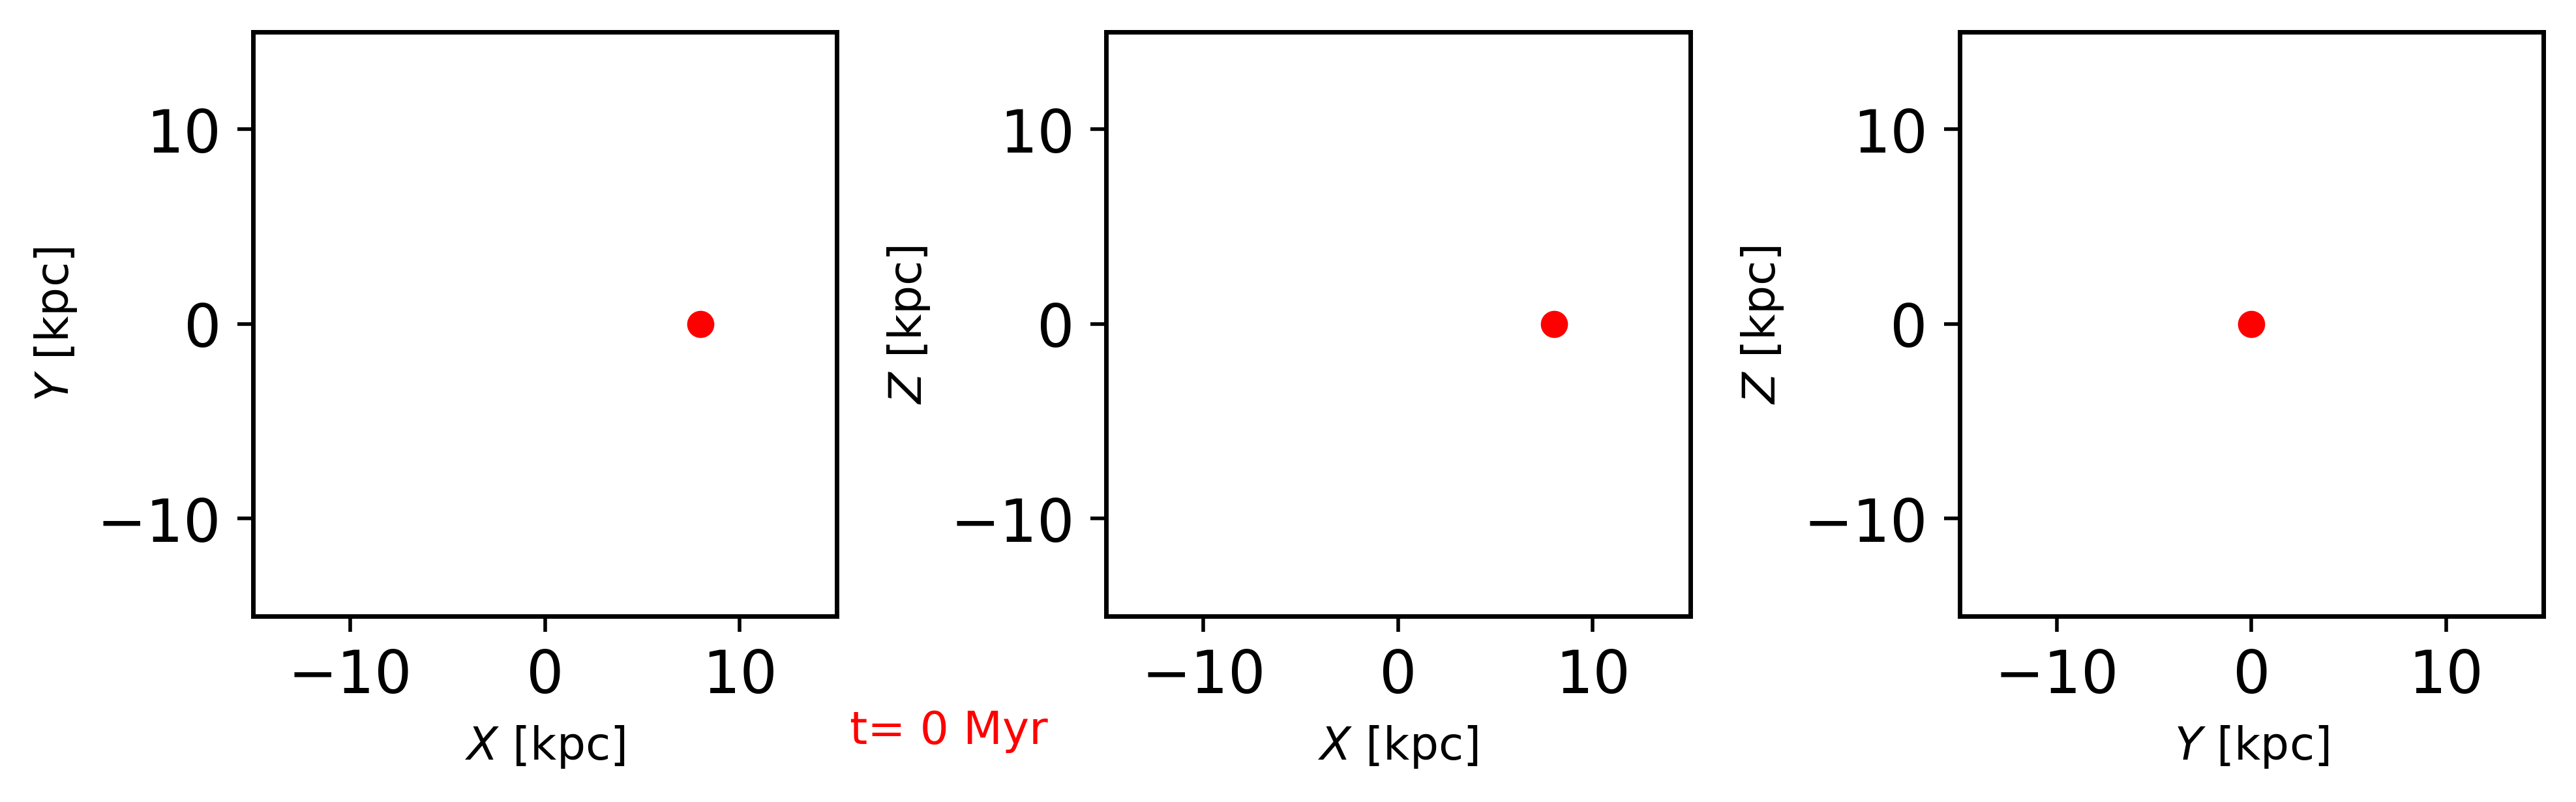

In [7]:
#Creation of the N-body simulation
simulation = simulator.Nbody_simulation(dir_data, dir_images)
#Simulation settings and initial conditions:
simulation.set_config(rho_0, r_c, epsilon, interactions, NFW, t_final, timesteps, frames, fps, video_title, resize, device)
simulation.set_visual(plot_type, ticks, color, markersize, xlim, ylim, line=True)  #'line' refers to whether the path of each star's orbit is displayed

### Starting simulation:

Different methods are tested for solving differential equations: Euler and Runge-Kutta 4 (Runge-Kutta 2 is also available).

#### Euler

In [8]:
#Each frame is simulated and saved:
simulation.simulate('Euler')   #make the iteration in time and save each frame
simulation.videoMaker()    #make the video, comment this if you do not have ffmpeg installed

Progress: 100%|██████████| 300/300 [00:29<00:00, 10.00it/s]


['im_0.jpg', 'im_1.jpg', 'im_2.jpg', 'im_3.jpg', 'im_4.jpg', 'im_5.jpg', 'im_6.jpg', 'im_7.jpg', 'im_8.jpg', 'im_9.jpg', 'im_10.jpg', 'im_11.jpg', 'im_12.jpg', 'im_13.jpg', 'im_14.jpg', 'im_15.jpg', 'im_16.jpg', 'im_17.jpg', 'im_18.jpg', 'im_19.jpg', 'im_20.jpg', 'im_21.jpg', 'im_22.jpg', 'im_23.jpg', 'im_24.jpg', 'im_25.jpg', 'im_26.jpg', 'im_27.jpg', 'im_28.jpg', 'im_29.jpg', 'im_30.jpg', 'im_31.jpg', 'im_32.jpg', 'im_33.jpg', 'im_34.jpg', 'im_35.jpg', 'im_36.jpg', 'im_37.jpg', 'im_38.jpg', 'im_39.jpg', 'im_40.jpg', 'im_41.jpg', 'im_42.jpg', 'im_43.jpg', 'im_44.jpg', 'im_45.jpg', 'im_46.jpg', 'im_47.jpg', 'im_48.jpg', 'im_49.jpg', 'im_50.jpg', 'im_51.jpg', 'im_52.jpg', 'im_53.jpg', 'im_54.jpg', 'im_55.jpg', 'im_56.jpg', 'im_57.jpg', 'im_58.jpg', 'im_59.jpg', 'im_60.jpg', 'im_61.jpg', 'im_62.jpg', 'im_63.jpg', 'im_64.jpg', 'im_65.jpg', 'im_66.jpg', 'im_67.jpg', 'im_68.jpg', 'im_69.jpg', 'im_70.jpg', 'im_71.jpg', 'im_72.jpg', 'im_73.jpg', 'im_74.jpg', 'im_75.jpg', 'im_76.jpg', 'im_77.j

Last frame is showed. All are in dir_images.

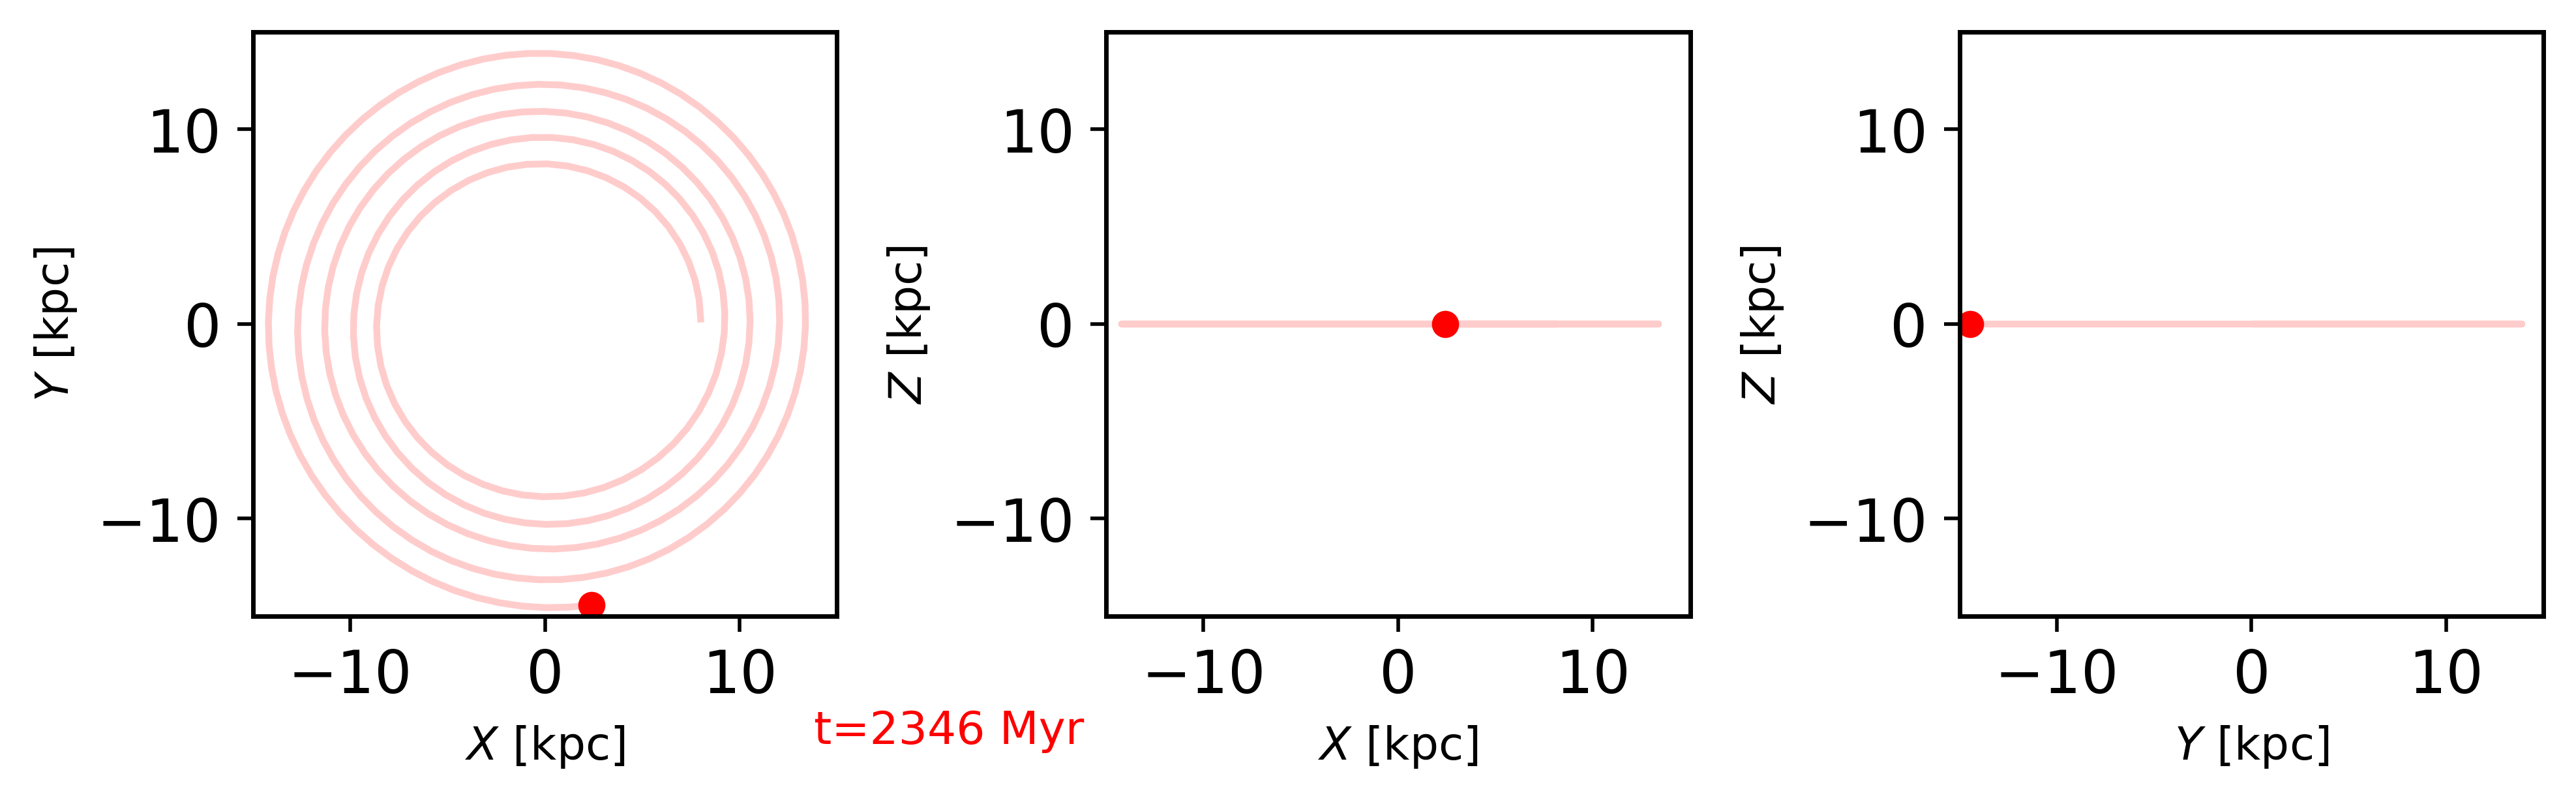

In [9]:
simulation.fig

VIDEO:

In [10]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/0lxY1SiEKIU?si=3nnnjqzwSucg77wv" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>')


C:\Users\mirab\AppData\Roaming\Python\Python310\site-packages\IPython\core\display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Video link: [https://www.youtube.com/watch?v=0lxY1SiEKIU](https://www.youtube.com/watch?v=0lxY1SiEKIU)

#### Runge-Kutta 4

In [11]:
simulation.restart() #to reset to the initial conditions
#Each frame is simulated and saved:
simulation.simulate('RK4')
simulation.videoMaker('./videos/sun_rk4')

Progress: 100%|██████████| 300/300 [00:32<00:00,  9.28it/s]


['im_0.jpg', 'im_1.jpg', 'im_2.jpg', 'im_3.jpg', 'im_4.jpg', 'im_5.jpg', 'im_6.jpg', 'im_7.jpg', 'im_8.jpg', 'im_9.jpg', 'im_10.jpg', 'im_11.jpg', 'im_12.jpg', 'im_13.jpg', 'im_14.jpg', 'im_15.jpg', 'im_16.jpg', 'im_17.jpg', 'im_18.jpg', 'im_19.jpg', 'im_20.jpg', 'im_21.jpg', 'im_22.jpg', 'im_23.jpg', 'im_24.jpg', 'im_25.jpg', 'im_26.jpg', 'im_27.jpg', 'im_28.jpg', 'im_29.jpg', 'im_30.jpg', 'im_31.jpg', 'im_32.jpg', 'im_33.jpg', 'im_34.jpg', 'im_35.jpg', 'im_36.jpg', 'im_37.jpg', 'im_38.jpg', 'im_39.jpg', 'im_40.jpg', 'im_41.jpg', 'im_42.jpg', 'im_43.jpg', 'im_44.jpg', 'im_45.jpg', 'im_46.jpg', 'im_47.jpg', 'im_48.jpg', 'im_49.jpg', 'im_50.jpg', 'im_51.jpg', 'im_52.jpg', 'im_53.jpg', 'im_54.jpg', 'im_55.jpg', 'im_56.jpg', 'im_57.jpg', 'im_58.jpg', 'im_59.jpg', 'im_60.jpg', 'im_61.jpg', 'im_62.jpg', 'im_63.jpg', 'im_64.jpg', 'im_65.jpg', 'im_66.jpg', 'im_67.jpg', 'im_68.jpg', 'im_69.jpg', 'im_70.jpg', 'im_71.jpg', 'im_72.jpg', 'im_73.jpg', 'im_74.jpg', 'im_75.jpg', 'im_76.jpg', 'im_77.j

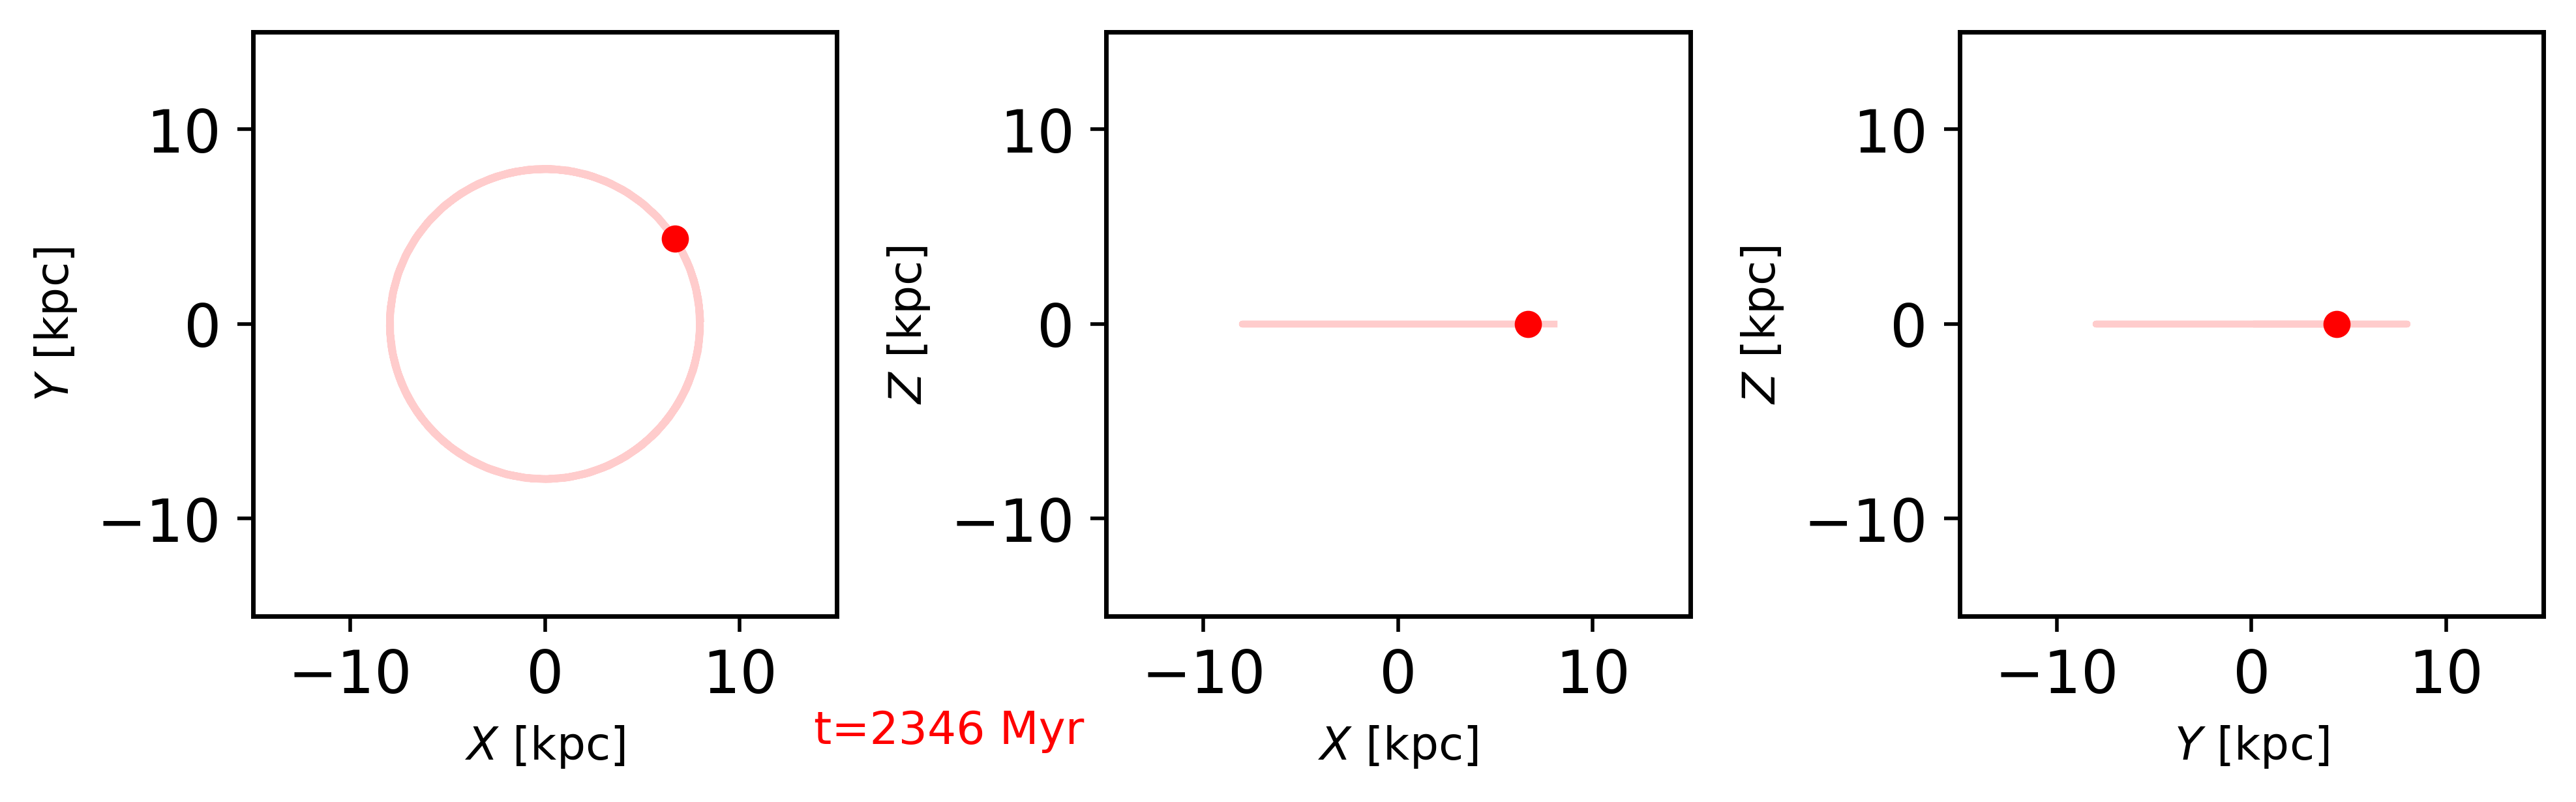

In [12]:
simulation.fig

In [13]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/69WPb1tUzJk?si=QFMwWRbiIA45qzpd" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>')


c:\ProgramData\anaconda3\lib\site-packages\IPython\core\display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Video link: [https://www.youtube.com/watch?v=69WPb1tUzJk](https://www.youtube.com/watch?v=69WPb1tUzJk)

It has been observed that Euler method is not sufficiently accurate with that number of timesteps. On the other hand, Runge-Kutta 4 is able to recover a reasonable orbit with the same number of timesteps.

## Exercise 2: A disk revolving around the Centre of the Galaxy

Different simulations are performed with a different number of particles. Particles interaction is disabled. 

### Initial Conditions and settings: 

The initial conditions are saved in disk10.txt, disk100.txt and in disk1000.txt. The files contain particles in the disk.

In [14]:
#Initial conditions files:
dir_data_10 = './ics/disk10.txt'
dir_data_100 = './ics/disk100.txt'
dir_data_1000 = './ics/disk1000.txt'

#Softening length [kpc]:
epsilon = 0.1  #not important, interactions will be disabled

#Parameters of the NFW profile:
rho_0 = 5932371.0 #[M_sun / kpc^3]
r_c = 20.0  #Scale length [kpc]

#Final time of the simulation [9.8e18 yr]:
t_final = 2
#Time steps of the simulation:
timesteps = 1000

#Particle interactions:
interactions = False
#NFW potential:
NFW = True

#3 plots or 1 ('single_2D, 'triple_2D', 'single_3D):
plot_type = 'triple_2D'
ticks = 'yes'  
color_10 = 'blue'
color_100 = 'black'
color_1000 = 'red' 
markersize_10 = 5
markersize_100 = 2
markersize_1000 = 2

xlim_10 = 25.0
ylim_10 = 25.0
xlim = 50.0
ylim = 50.0

#Directories where the images will be saved:
dir_images_10 = './images/images_disk10/'
dir_images_100 = './images/images_disk100/'
dir_images_1000 = './images/images_disk1000/'

#Title of the video:
video_title_10 = './videos/disk10'
video_title_100 = './videos/disk100'
video_title_1000 = './videos/disk1000'
#Frames per second of the videos:
fps = 30
#Number of frames in the videos (it can not be larger than the timesteps of the simulation):
frames = 300
#Scale factor of the images (it is recommended to keep it at 1 unless the video consumes excessive memory):
resize = 1


#### Aplying simulation settings

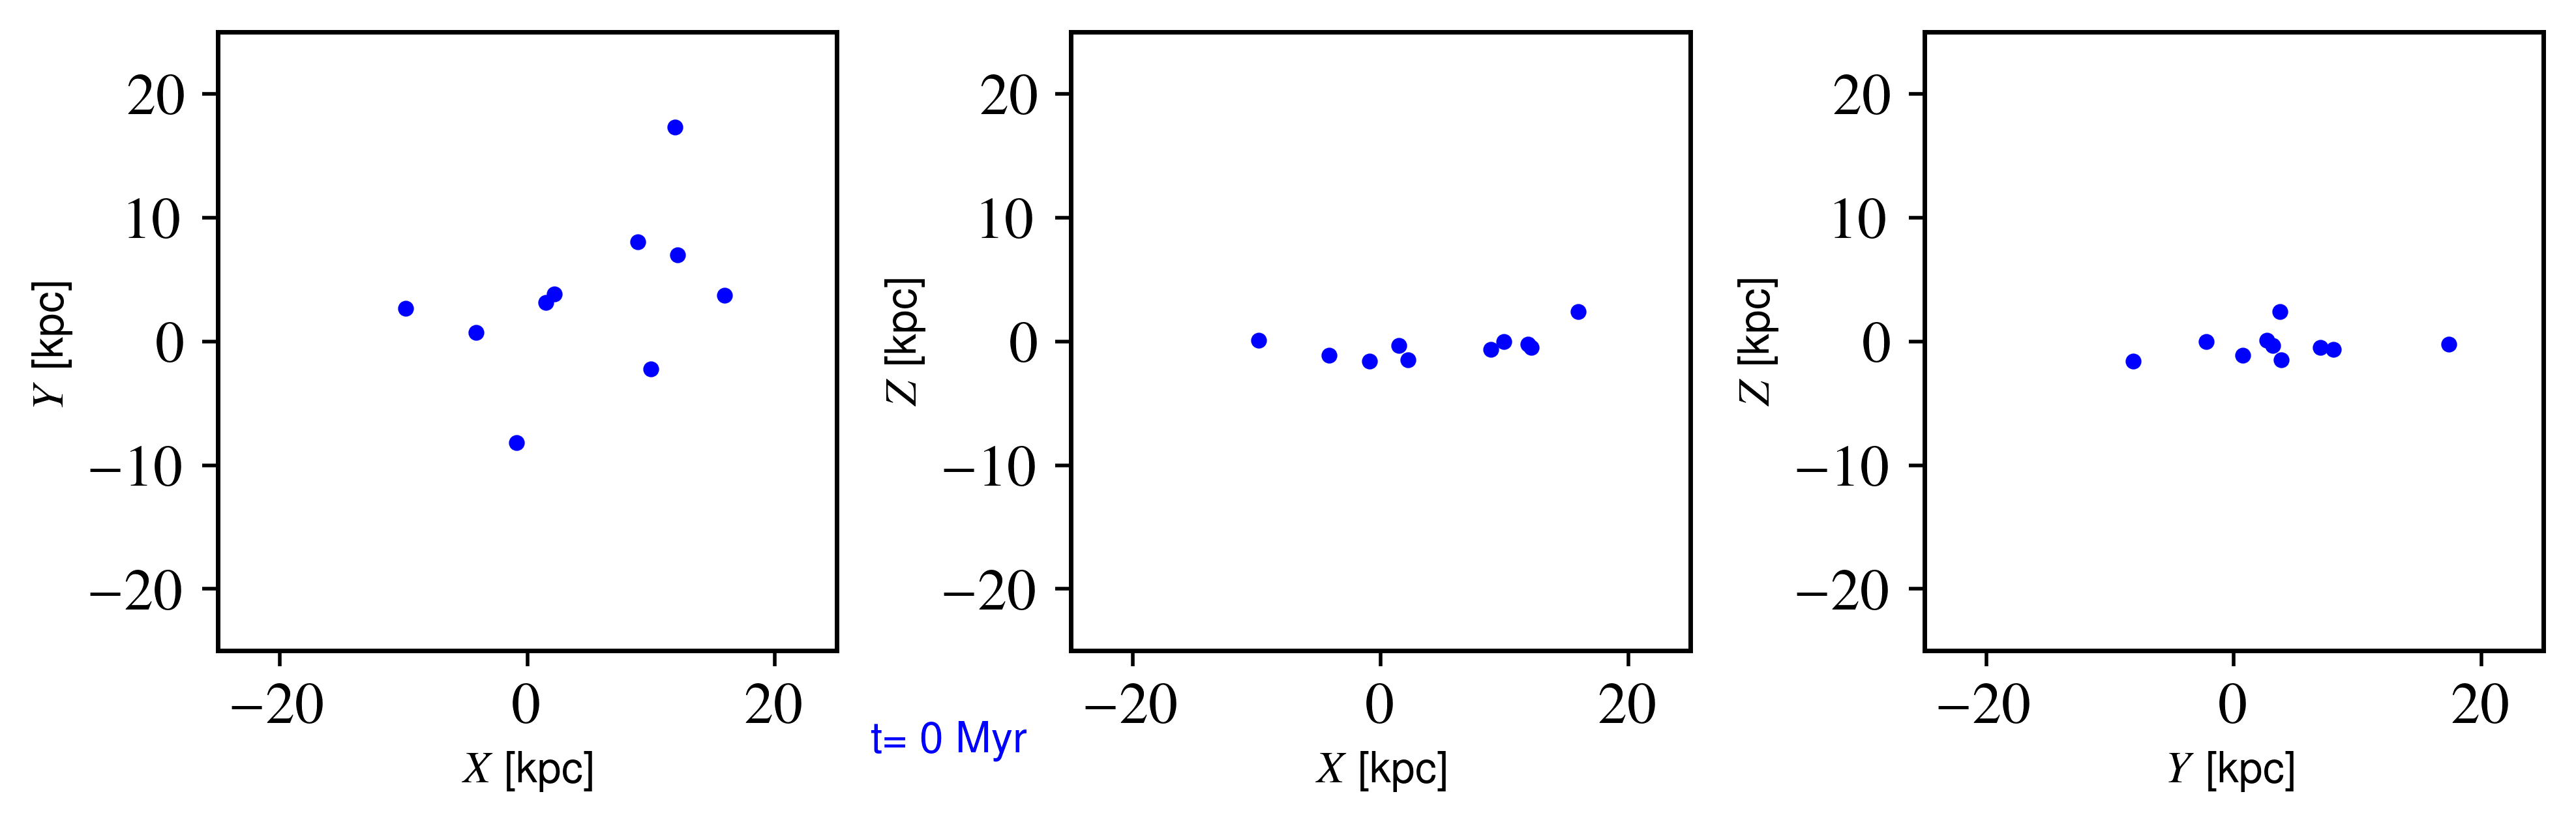

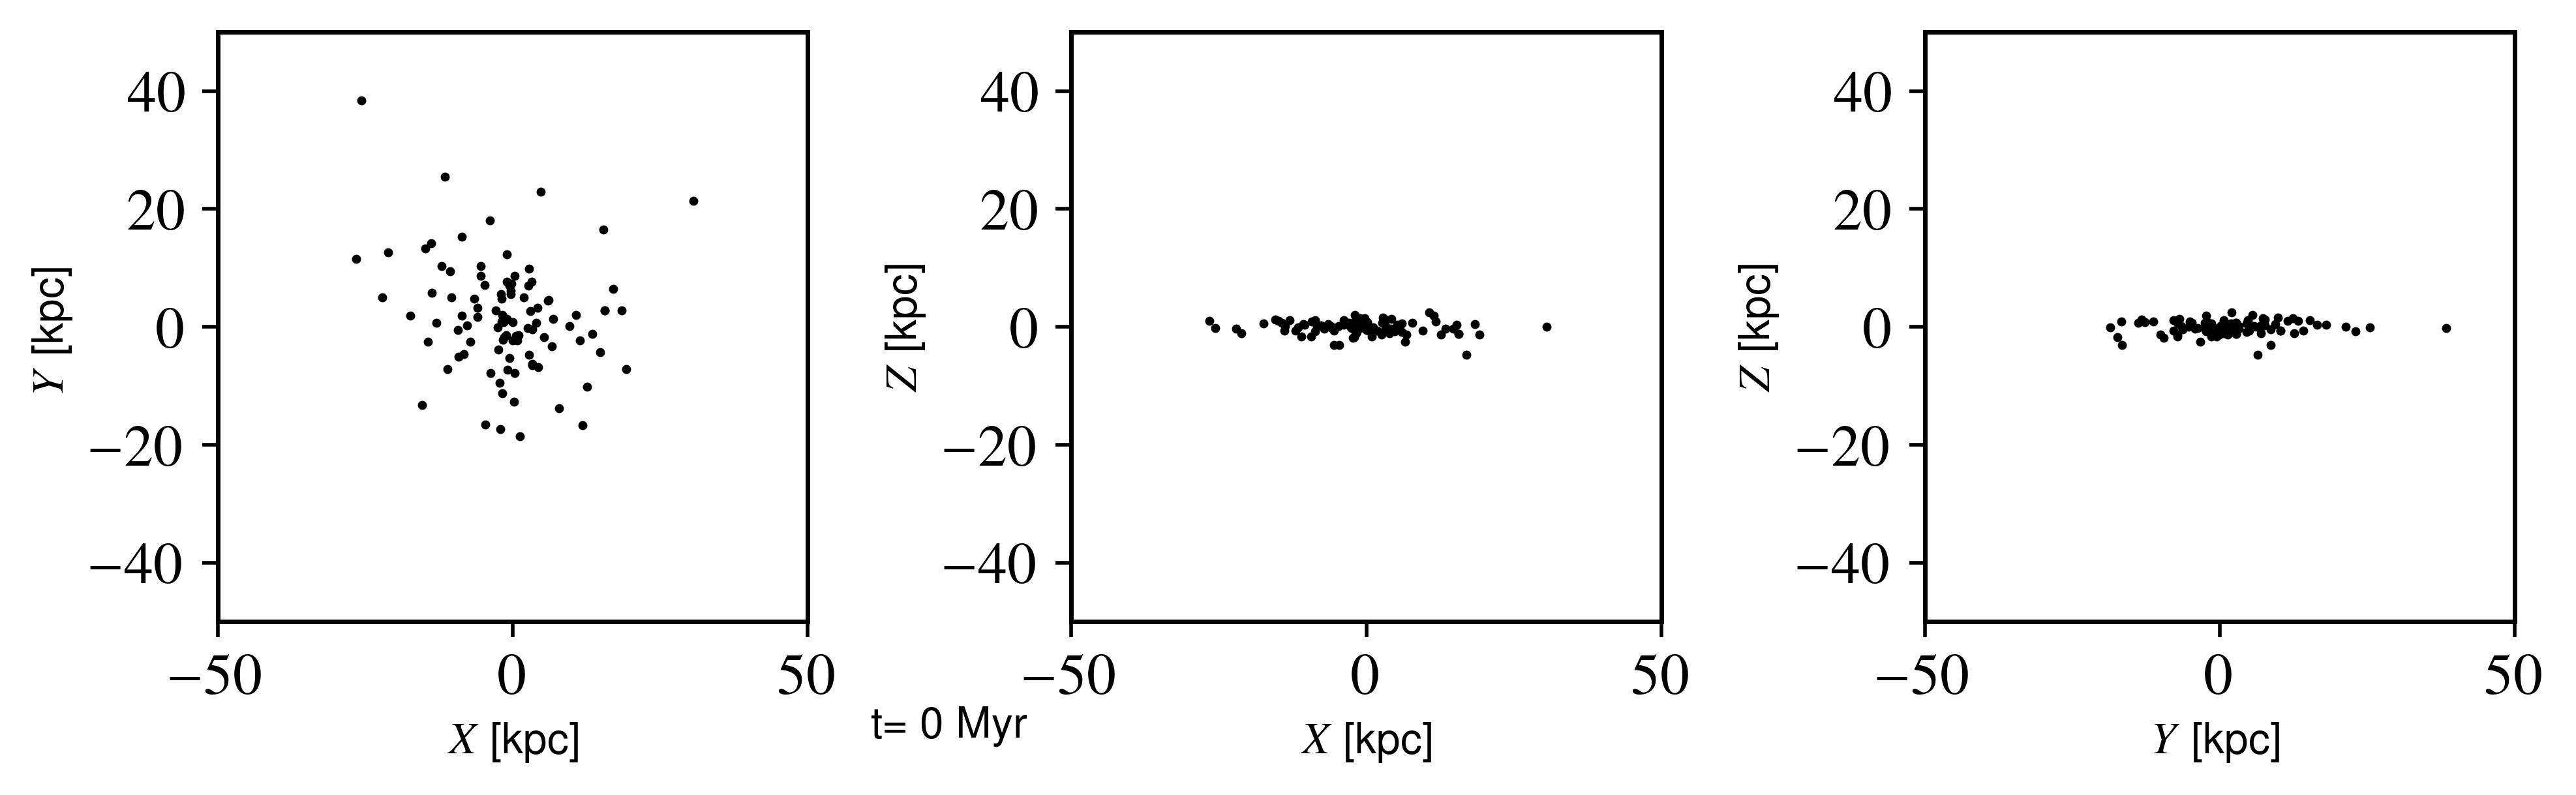

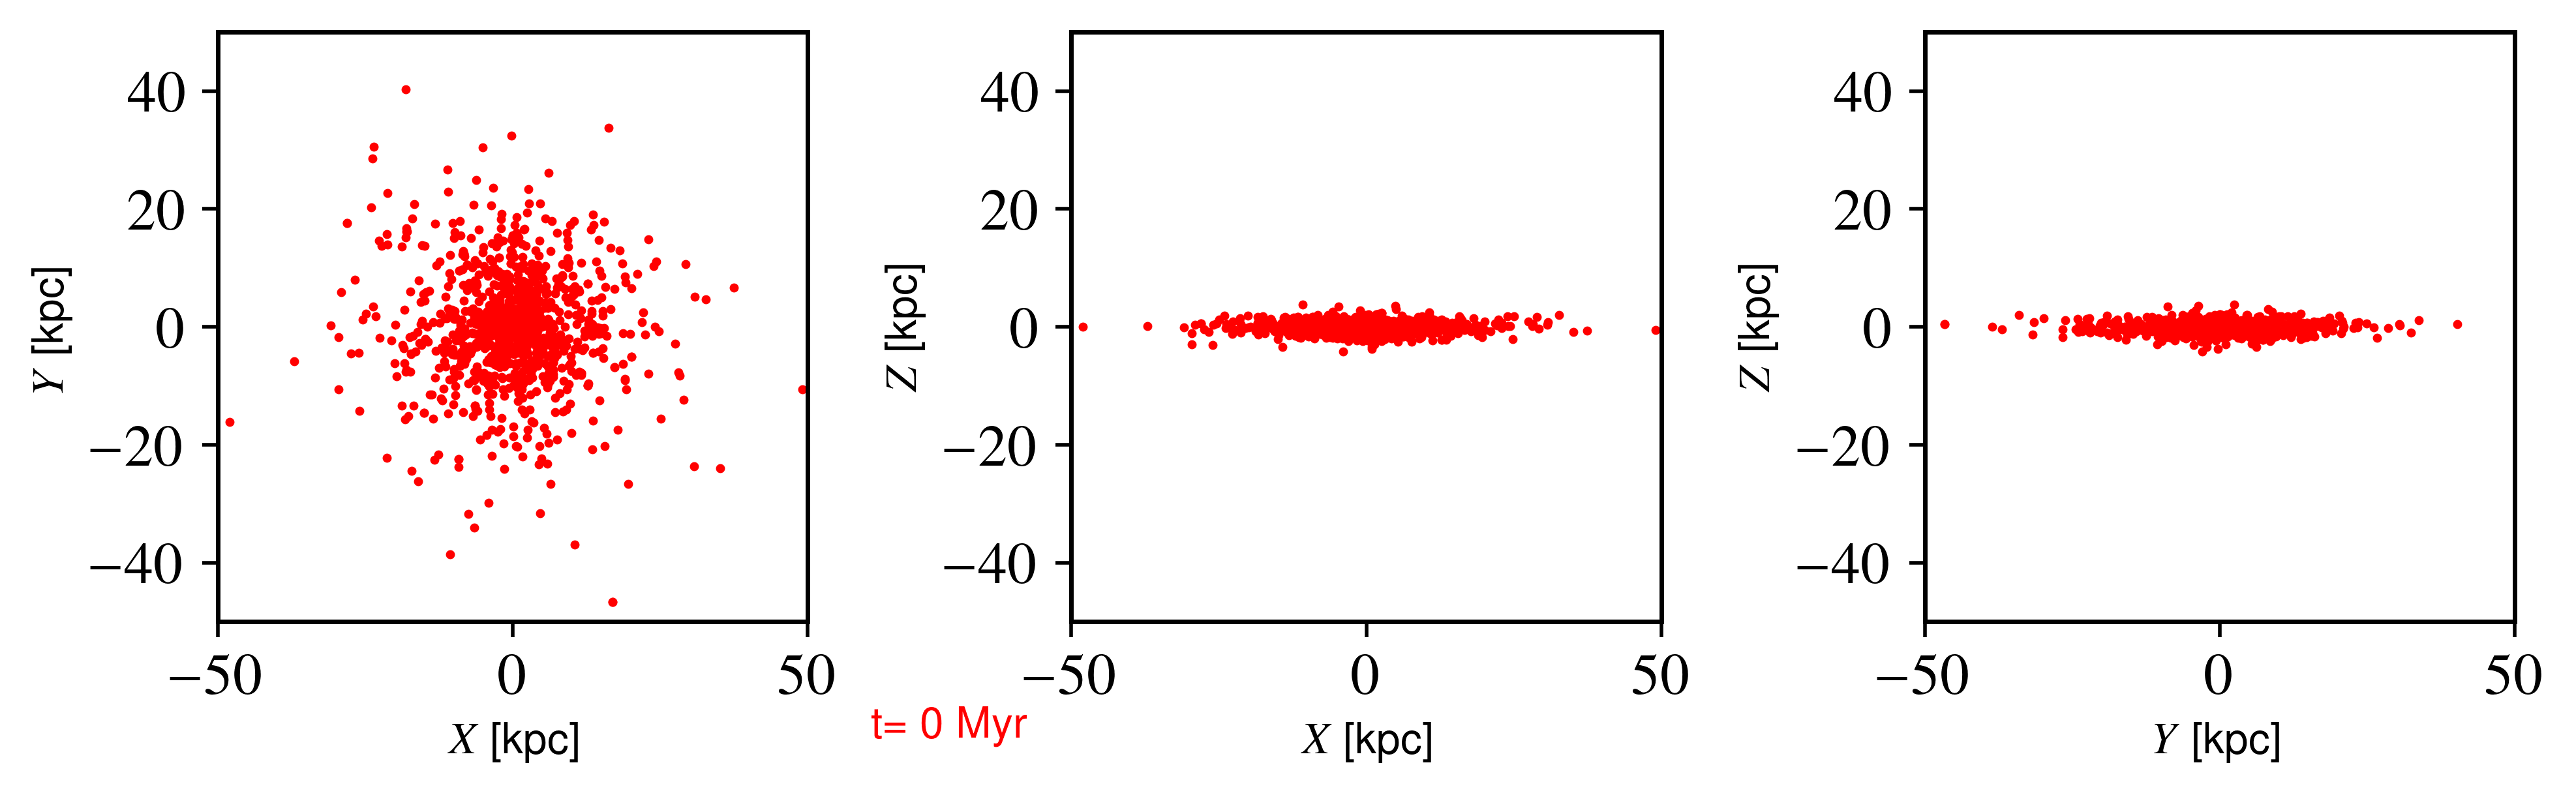

In [15]:
#Creation of the N-body simulation
simulation_10 = simulator.Nbody_simulation(dir_data_10, dir_images_10)

simulation_100 = simulator.Nbody_simulation(dir_data_100, dir_images_100)

simulation_1000 = simulator.Nbody_simulation(dir_data_1000, dir_images_1000)

#Simulation settings and initial conditions:
simulation_10.set_config(rho_0, r_c, epsilon, interactions, NFW, t_final, timesteps, frames, fps, video_title_10, resize, device)
simulation_10.set_visual(plot_type, ticks, color_10, markersize_10, xlim_10, ylim_10, line=True)

simulation_100.set_config(rho_0, r_c, epsilon, interactions, NFW, t_final, timesteps, frames, fps, video_title_100, resize, device)
simulation_100.set_visual(plot_type, ticks, color_100, markersize_100, xlim, ylim, line=False)

simulation_1000.set_config(rho_0, r_c, epsilon, interactions, NFW, t_final, timesteps, frames, fps, video_title_1000, resize, device)
simulation_1000.set_visual(plot_type, ticks, color_1000, markersize_1000, xlim, ylim, line=False)

### Starting simulation:

In [16]:
#Each frame is simulated and saved:
simulation_10.simulate('RK4')
simulation_10.videoMaker()

Progress: 100%|██████████| 300/300 [00:50<00:00,  5.99it/s]


['im_0.jpg', 'im_1.jpg', 'im_2.jpg', 'im_3.jpg', 'im_4.jpg', 'im_5.jpg', 'im_6.jpg', 'im_7.jpg', 'im_8.jpg', 'im_9.jpg', 'im_10.jpg', 'im_11.jpg', 'im_12.jpg', 'im_13.jpg', 'im_14.jpg', 'im_15.jpg', 'im_16.jpg', 'im_17.jpg', 'im_18.jpg', 'im_19.jpg', 'im_20.jpg', 'im_21.jpg', 'im_22.jpg', 'im_23.jpg', 'im_24.jpg', 'im_25.jpg', 'im_26.jpg', 'im_27.jpg', 'im_28.jpg', 'im_29.jpg', 'im_30.jpg', 'im_31.jpg', 'im_32.jpg', 'im_33.jpg', 'im_34.jpg', 'im_35.jpg', 'im_36.jpg', 'im_37.jpg', 'im_38.jpg', 'im_39.jpg', 'im_40.jpg', 'im_41.jpg', 'im_42.jpg', 'im_43.jpg', 'im_44.jpg', 'im_45.jpg', 'im_46.jpg', 'im_47.jpg', 'im_48.jpg', 'im_49.jpg', 'im_50.jpg', 'im_51.jpg', 'im_52.jpg', 'im_53.jpg', 'im_54.jpg', 'im_55.jpg', 'im_56.jpg', 'im_57.jpg', 'im_58.jpg', 'im_59.jpg', 'im_60.jpg', 'im_61.jpg', 'im_62.jpg', 'im_63.jpg', 'im_64.jpg', 'im_65.jpg', 'im_66.jpg', 'im_67.jpg', 'im_68.jpg', 'im_69.jpg', 'im_70.jpg', 'im_71.jpg', 'im_72.jpg', 'im_73.jpg', 'im_74.jpg', 'im_75.jpg', 'im_76.jpg', 'im_77.j

In [17]:
#Each frame is simulated and saved:
simulation_100.simulate('RK4')
simulation_100.videoMaker()

Progress: 100%|██████████| 300/300 [00:38<00:00,  7.87it/s]


['im_0.jpg', 'im_1.jpg', 'im_2.jpg', 'im_3.jpg', 'im_4.jpg', 'im_5.jpg', 'im_6.jpg', 'im_7.jpg', 'im_8.jpg', 'im_9.jpg', 'im_10.jpg', 'im_11.jpg', 'im_12.jpg', 'im_13.jpg', 'im_14.jpg', 'im_15.jpg', 'im_16.jpg', 'im_17.jpg', 'im_18.jpg', 'im_19.jpg', 'im_20.jpg', 'im_21.jpg', 'im_22.jpg', 'im_23.jpg', 'im_24.jpg', 'im_25.jpg', 'im_26.jpg', 'im_27.jpg', 'im_28.jpg', 'im_29.jpg', 'im_30.jpg', 'im_31.jpg', 'im_32.jpg', 'im_33.jpg', 'im_34.jpg', 'im_35.jpg', 'im_36.jpg', 'im_37.jpg', 'im_38.jpg', 'im_39.jpg', 'im_40.jpg', 'im_41.jpg', 'im_42.jpg', 'im_43.jpg', 'im_44.jpg', 'im_45.jpg', 'im_46.jpg', 'im_47.jpg', 'im_48.jpg', 'im_49.jpg', 'im_50.jpg', 'im_51.jpg', 'im_52.jpg', 'im_53.jpg', 'im_54.jpg', 'im_55.jpg', 'im_56.jpg', 'im_57.jpg', 'im_58.jpg', 'im_59.jpg', 'im_60.jpg', 'im_61.jpg', 'im_62.jpg', 'im_63.jpg', 'im_64.jpg', 'im_65.jpg', 'im_66.jpg', 'im_67.jpg', 'im_68.jpg', 'im_69.jpg', 'im_70.jpg', 'im_71.jpg', 'im_72.jpg', 'im_73.jpg', 'im_74.jpg', 'im_75.jpg', 'im_76.jpg', 'im_77.j

In [18]:
#Each frame is simulated and saved:
simulation_1000.simulate('RK4')
simulation_1000.videoMaker()

Progress: 100%|██████████| 300/300 [00:45<00:00,  6.64it/s]


['im_0.jpg', 'im_1.jpg', 'im_2.jpg', 'im_3.jpg', 'im_4.jpg', 'im_5.jpg', 'im_6.jpg', 'im_7.jpg', 'im_8.jpg', 'im_9.jpg', 'im_10.jpg', 'im_11.jpg', 'im_12.jpg', 'im_13.jpg', 'im_14.jpg', 'im_15.jpg', 'im_16.jpg', 'im_17.jpg', 'im_18.jpg', 'im_19.jpg', 'im_20.jpg', 'im_21.jpg', 'im_22.jpg', 'im_23.jpg', 'im_24.jpg', 'im_25.jpg', 'im_26.jpg', 'im_27.jpg', 'im_28.jpg', 'im_29.jpg', 'im_30.jpg', 'im_31.jpg', 'im_32.jpg', 'im_33.jpg', 'im_34.jpg', 'im_35.jpg', 'im_36.jpg', 'im_37.jpg', 'im_38.jpg', 'im_39.jpg', 'im_40.jpg', 'im_41.jpg', 'im_42.jpg', 'im_43.jpg', 'im_44.jpg', 'im_45.jpg', 'im_46.jpg', 'im_47.jpg', 'im_48.jpg', 'im_49.jpg', 'im_50.jpg', 'im_51.jpg', 'im_52.jpg', 'im_53.jpg', 'im_54.jpg', 'im_55.jpg', 'im_56.jpg', 'im_57.jpg', 'im_58.jpg', 'im_59.jpg', 'im_60.jpg', 'im_61.jpg', 'im_62.jpg', 'im_63.jpg', 'im_64.jpg', 'im_65.jpg', 'im_66.jpg', 'im_67.jpg', 'im_68.jpg', 'im_69.jpg', 'im_70.jpg', 'im_71.jpg', 'im_72.jpg', 'im_73.jpg', 'im_74.jpg', 'im_75.jpg', 'im_76.jpg', 'im_77.j

Below are the last generated frames for each simulations.

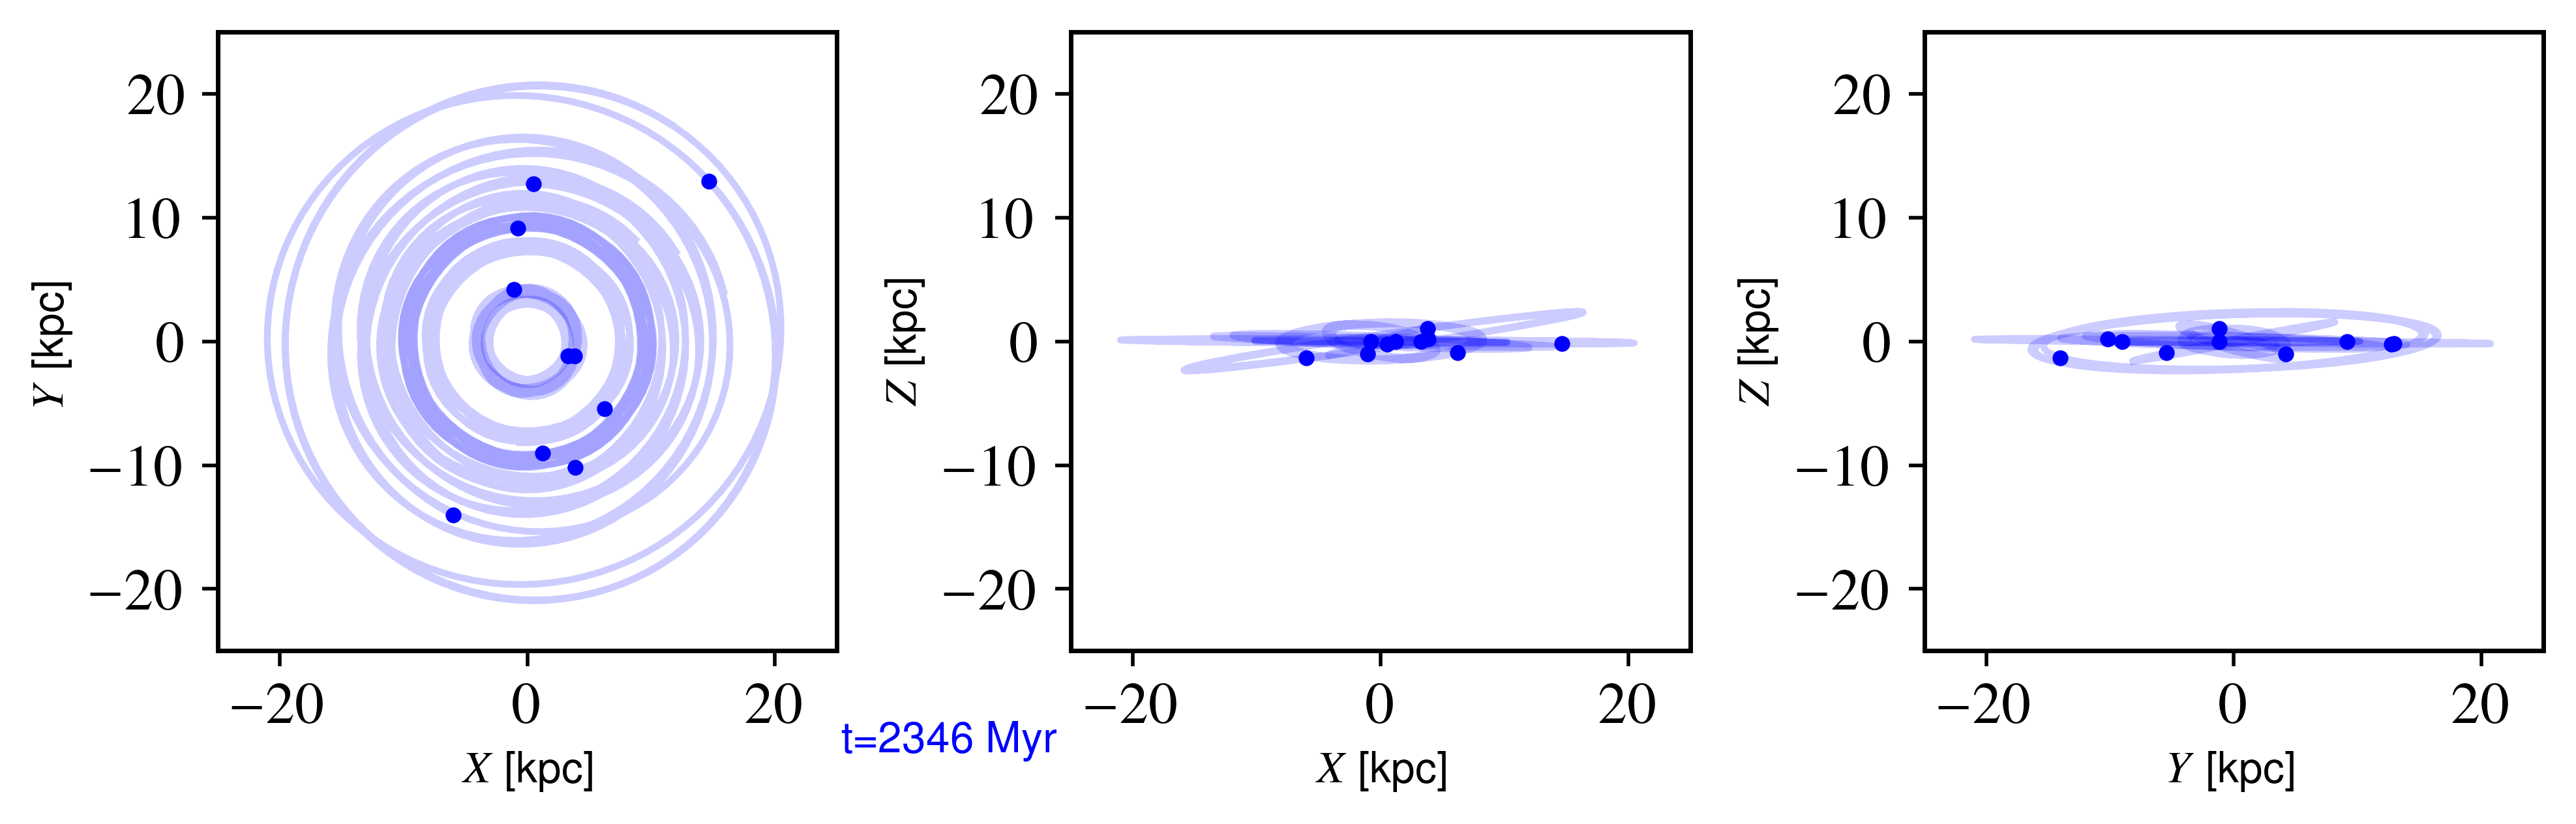

In [19]:
simulation_10.fig

In [20]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/5w3Nfukfm6Q?si=d3XbTz2qq1t_V33N" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>')

c:\ProgramData\anaconda3\lib\site-packages\IPython\core\display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Video link: [https://youtu.be/5w3Nfukfm6Q](https://youtu.be/5w3Nfukfm6Q)

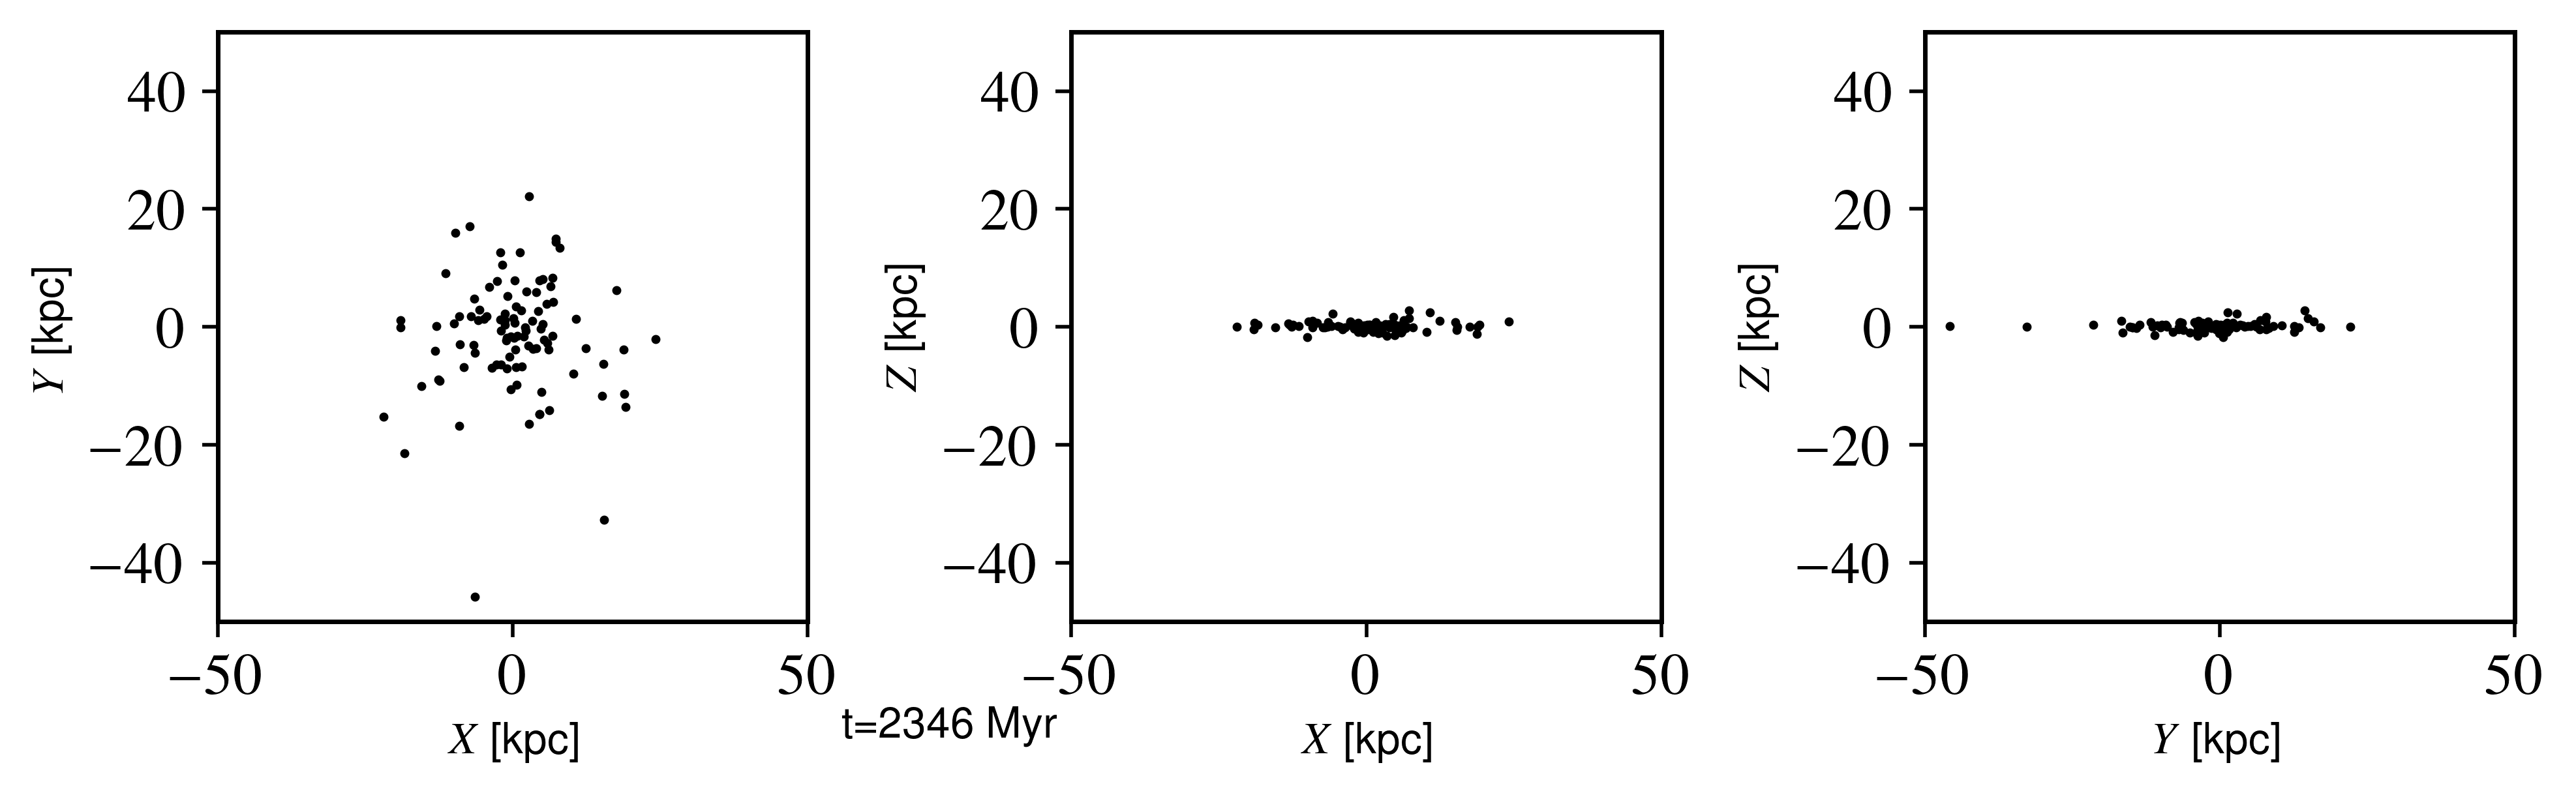

In [21]:
simulation_100.fig

In [22]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/pTqnpCUlLAI?si=hUQXQcPXMWlLpxTy" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>')

Video link: [https://youtu.be/pTqnpCUlLAI](https://youtu.be/pTqnpCUlLAI)

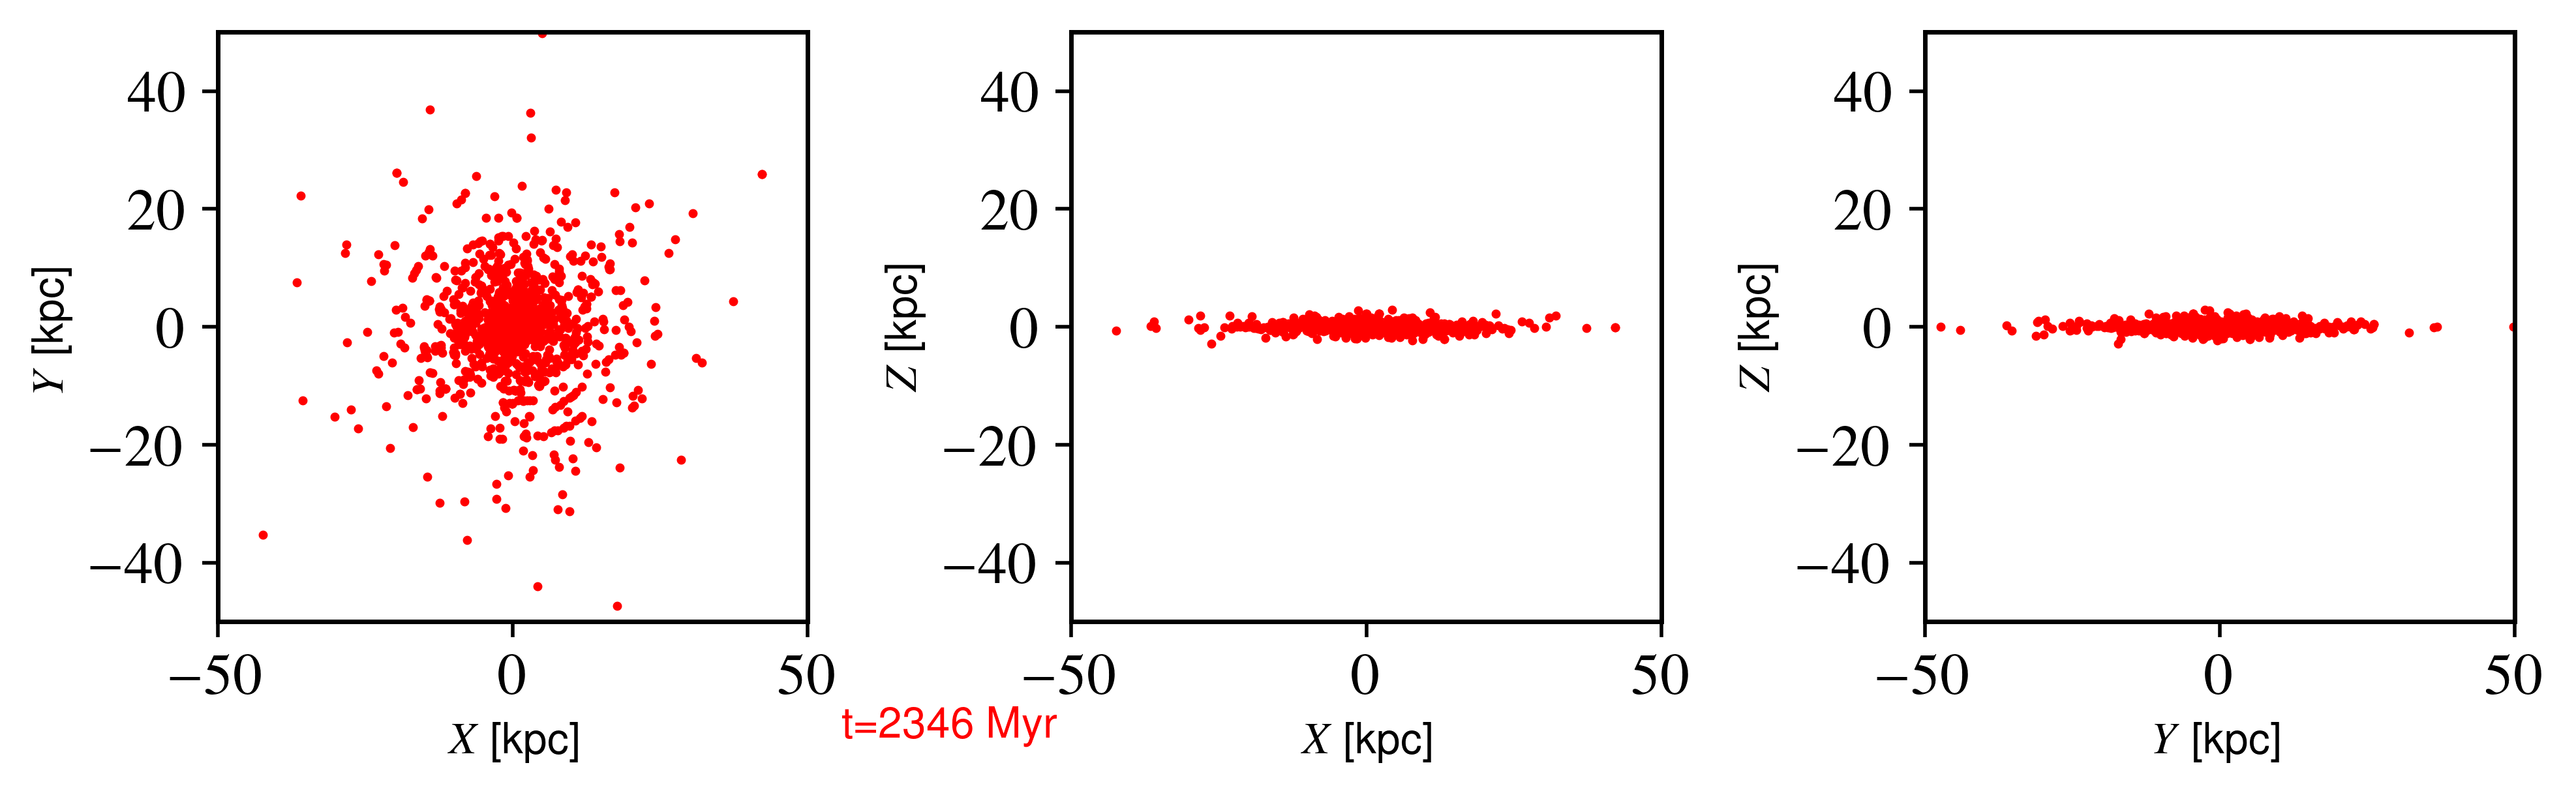

In [23]:
simulation_1000.fig

In [24]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/fWpY5SzM_Bw?si=a5V1JfkUPfHqvgu6" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>')

Video link: [https://youtu.be/fWpY5SzM_Bw](https://youtu.be/fWpY5SzM_Bw)

Stable orbits are observed, nearly circular and almost contained in the plane of the disk.

### Running time:

In this section, I will analyze the dependency of execution time on the number of particles in each simulation. Besides, I will make a comparison between using CPU or GPU.

For this purpose I will generate different files with initial conditions. They will differ in the number of stars and all will follow an exponential disk (in density). The initial velocities are the circular velocities ($v_c$) derived from an NFW potential and from a point mass that represent the mass of all stars at a certain radius ($\phi(r)$):

$v_c = \sqrt{r \left|\dfrac{d\phi(r)}{dr}\right|}$

$\phi(r) = - \dfrac{4\pi G \rho_0 r_c^3}{r} \ln(\dfrac{r_c + r}{r_c}) - \dfrac{G M_*(r)}{r}$

$\left|\dfrac{d\phi(r)}{dr}\right| = \dfrac{4\pi G \rho_0 r_c^3}{r^2 (r_c + r)}\left((r_c+r)\ln(\dfrac{r_c + r}{r_c}) - r\right)  +  \dfrac{G M_*(r)}{r^2}$ 

For a more accurate simulation, it should consider the potential generated by the stars in a disk rather than considering a point mass, but I will proceed by this way.

When a frame is generated, the process can be divided into 2 parts. In one part, the positions and velocities of the particles are calculated for that moment. The second part involves updating the plot and saving it. Efforts have been made to optimize both parts of the process to have a fast code. However, more focus has been placed on improving the calculation time (first part). In this section, the execution time of the first part is analyzed. But it should be noted that when large numbers of particles are involved, updating the plot can be very slow. Therefore, in certain cases, not only the calculation time will be limiting but also the time it takes to plot. To minimize this, in this section, only one frame is generated per simulation (although all timesteps are calculated). In other words, the first part will be done as in any other simulation, but the second part will only be done once.


In [25]:
time_test_files = './time_test/'
if not (os.path.exists(time_test_files)):
    os.makedirs(time_test_files)
    
files = os.listdir(time_test_files)
for file in files:
    file_path = os.path.join(time_test_files, file)
    os.remove(file_path)

#Parameters of the NFW profile:
rho_0 = 5932371.0 #[M_sun / kpc^3]
r_c = 20.0  #Scale length [kpc]

n_simulations = np.logspace(1, 5, num=32).astype(int)
for i in n_simulations:
    ic = ic_gen.ic(i, f'{time_test_files}N{i}_time_test.txt')
    ic.NFW(rho_0, r_c, 5e10, 0.3, 10)  #sigma in Z of 0.3 kpc: scale height of thin disk (Jurić et al, 2008)
    ic.save_file()

Next, the velocity curves of the last file of initial conditions is showed. This is to check that the calculation of velocities is right. 

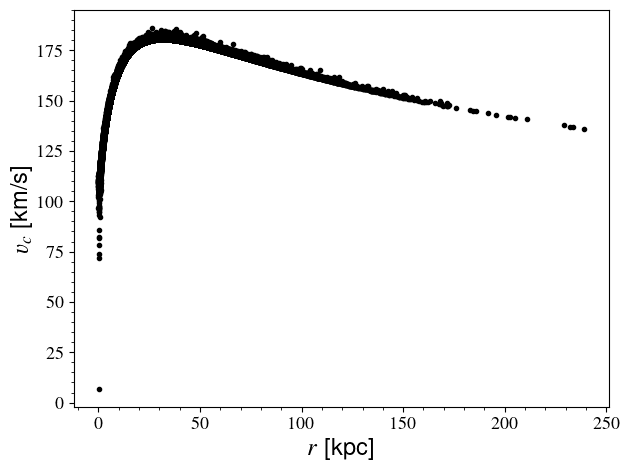

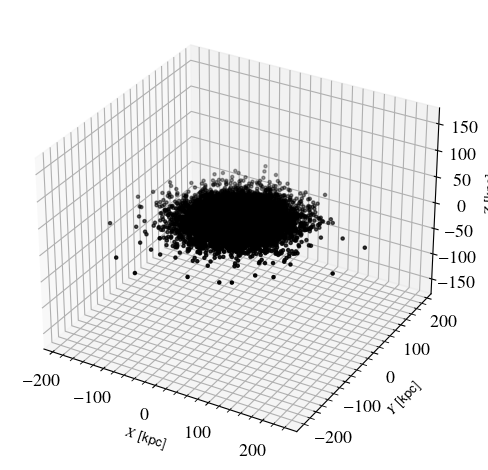

In [26]:
ic.v_curve()
fig, ax = ic.xyz()

The typicial velocity curve due to an NFW profiel is observed, where there is no a Keplerian fall-off as radius increases. This is an indication that the initial conditions are well generated.

Next, simulations will be run with the previous initial conditions. The generated images are not of interest, only the time taken to generate each simulation.

In [27]:
dir_data = [time_test_files+file for file in os.listdir(time_test_files) if file.endswith('time_test.txt')]
dir_data.sort(key=lambda x: int(x.split("N")[-1].split("_")[0]))

dir_images = './images_trash/' 
video_title = 'times'

In [28]:
rho_0 = 5932371.0 
r_c = 20.0  
epsilon=1
frames = 1
fps=30
resize=1
plot_type='triple_2D'
ticks='yes'
color='black'
markersize=1
xlim, ylim = 30, 30
timesteps= 1000
t_final = 2
interactions = False
NFW = True

ex_time = np.empty(len(dir_data))
for i in tqdm(range(len(dir_data)), desc="Total progress"):
    simulation = simulator.Nbody_simulation(dir_data[i], dir_images)
    simulation.set_config(rho_0, r_c, epsilon, interactions, NFW, t_final, timesteps, frames, fps, video_title, resize, device)
    simulation.set_visual(plot_type, ticks, color, markersize, xlim, ylim, line=False)
    plt.close()
    
    simulation.simulate('RK4')
    ex_time[i] = simulation.execution_time

Total progress: 100%|██████████| 32/32 [00:39<00:00,  1.25s/it]


The same test is done but using the CPU (before I used GPU).

In [29]:
ex_time_cpu = np.empty(len(dir_data))
for i in tqdm(range(len(dir_data)), desc="Total progress"):
    simulation = simulator.Nbody_simulation(dir_data[i], dir_images)
    simulation.set_config(rho_0, r_c, epsilon, interactions, NFW, t_final, timesteps, frames, fps, video_title, resize, 'cpu')
    simulation.set_visual(plot_type, ticks, color, markersize, xlim, ylim, line=False)
    plt.close()
    
    simulation.simulate('RK4')
    ex_time_cpu[i] = simulation.execution_time

Total progress: 100%|██████████| 32/32 [00:40<00:00,  1.25s/it]


A plot is shown with the time it takes for a simulation to run as a function os the number of particles in the simulation.

Text(0, 0.5, 'Execution time [s]')

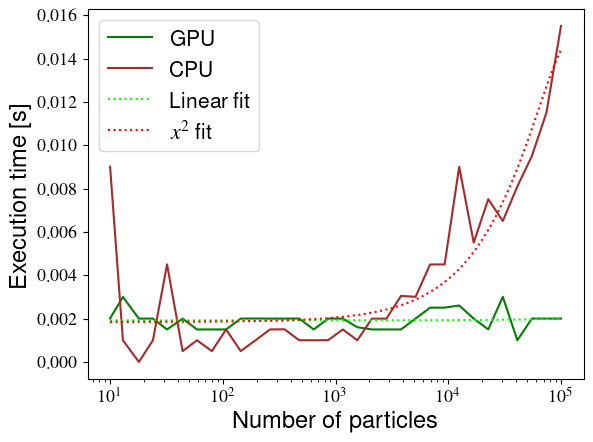

In [30]:
plt.plot(n_simulations, ex_time, color='green', label='GPU')
plt.xscale('log')
plt.plot(n_simulations, ex_time_cpu, color='brown', label='CPU')
fit = np.polyfit(n_simulations, ex_time, 1)
plt.plot(np.arange(n_simulations[0], n_simulations[-1]), np.polyval(fit, np.arange(n_simulations[0], n_simulations[-1])), ':', color='lime', label='Linear fit')
fit_cpu = np.polyfit(n_simulations, ex_time_cpu, 2)
plt.plot(np.arange(n_simulations[0], n_simulations[-1]), np.polyval(fit_cpu, np.arange(n_simulations[0], n_simulations[-1])), ':', color='red', label='$x^2$ fit')
plt.legend(fontsize=16)
plt.xlabel('Number of particles', fontsize=18)
plt.ylabel('Execution time [s]', fontsize=18)

For this range of number of particles, the execution time on GPU practically does not vary with the number of particles. This indicate that the number of particles can be increased significantly more. It should be noted that these simulations have been done without calculating the interactions between particles (which is the computationally expensive part). With the CPU, it seems that in the range with few particles (<1000) it is linear, but the it acquires a quadratic dependence with the number of particles.

## Exercise 3: A disk revolving around the Centre of the Galaxy with self-gravity

In this section the gravitational interaction between stars is added to the previous simulations. In the inner regions, the mass of the stars is comparable with the dark matter mass. So, it is important to take into account the particle interaction. I will use the previous initial conditions of 10, 100, and 1000 particles.

### Settings:

In [33]:
#Initial conditions file:
dir_data_10 = './ics/disk10.txt'
dir_data_100 = './ics/disk100.txt'
dir_data_1000 = './ics/disk1000.txt'

#Softening length [kpc]:
epsilon_10 = 1 
epsilon_100 = 0.1
epsilon_1000 = 0.01

#Parameters of the NFW profile:
rho_0 = 5932371.0 #[M_sun / kpc^3]
r_c = 20.0  #Scale length [kpc]

t_final = 2
timesteps=1000

#Particle interactions:
interactions = True
#NFW potential:
NFW = True

#3 plots or 1 ('single_2D, 'triple_2D', 'single_3D):
plot_type = 'triple_2D'
ticks = 'yes'  
color_10 = 'blue'
color_100 = 'black' 
color_1000 = 'red' 
markersize_10 = 2
markersize_100 = 2
markersize_1000 = 2

xlim = 50.0
ylim = 50.0

#Directory where the images will be saved:
dir_images_10 = './images/images_disk10_int'
dir_images_100 = './images/images_disk100_int'
dir_images_1000 = './images/images_disk1000_int'
#Title of the video:
video_title_10 = './videos/disk10_int'
video_title_100 = './videos/disk100_int'
video_title_1000 = './videos/disk1000_int'
#Frames per second of the video:
fps = 30
#Number of frames in the video (it can not be larger than the timesteps of the simulation):
frames = 300
#Scale factor of the images (it is recommended to keep it at 1 unless the video consumes excessive memory):
resize = 1

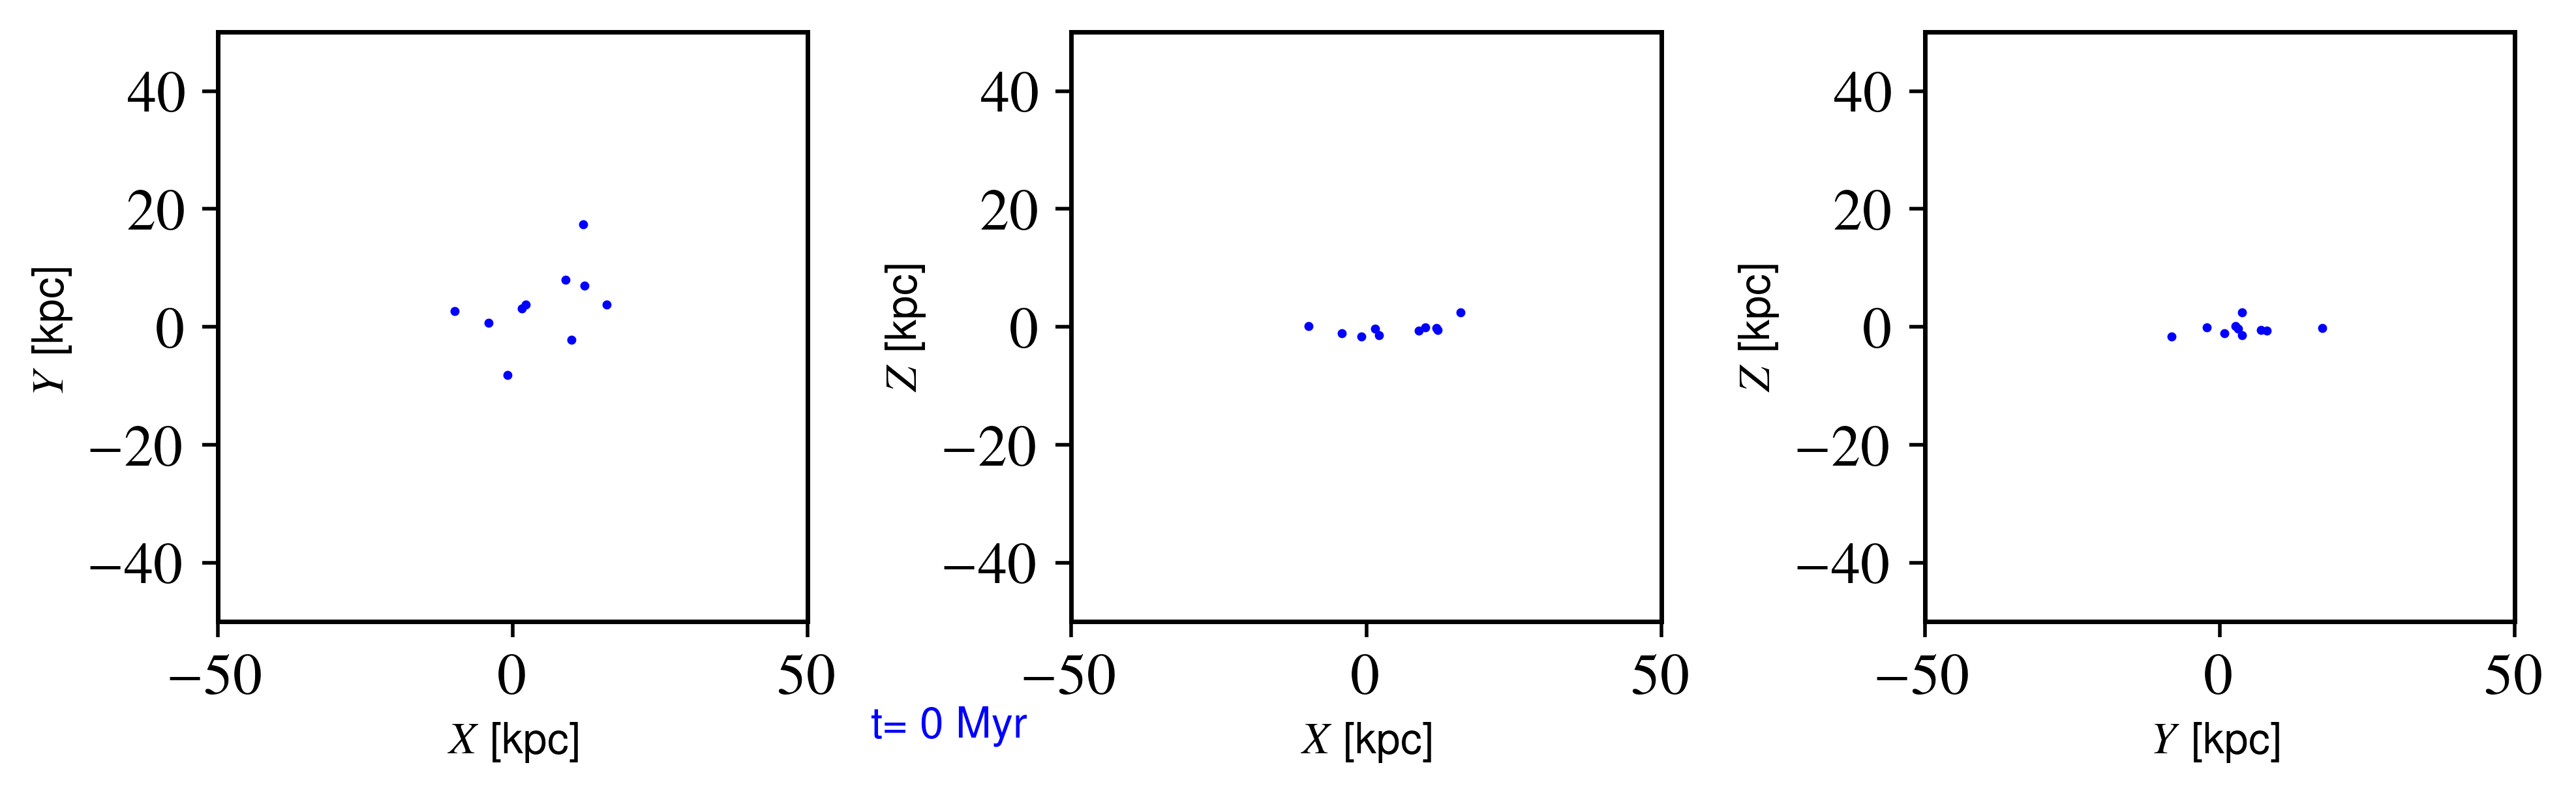

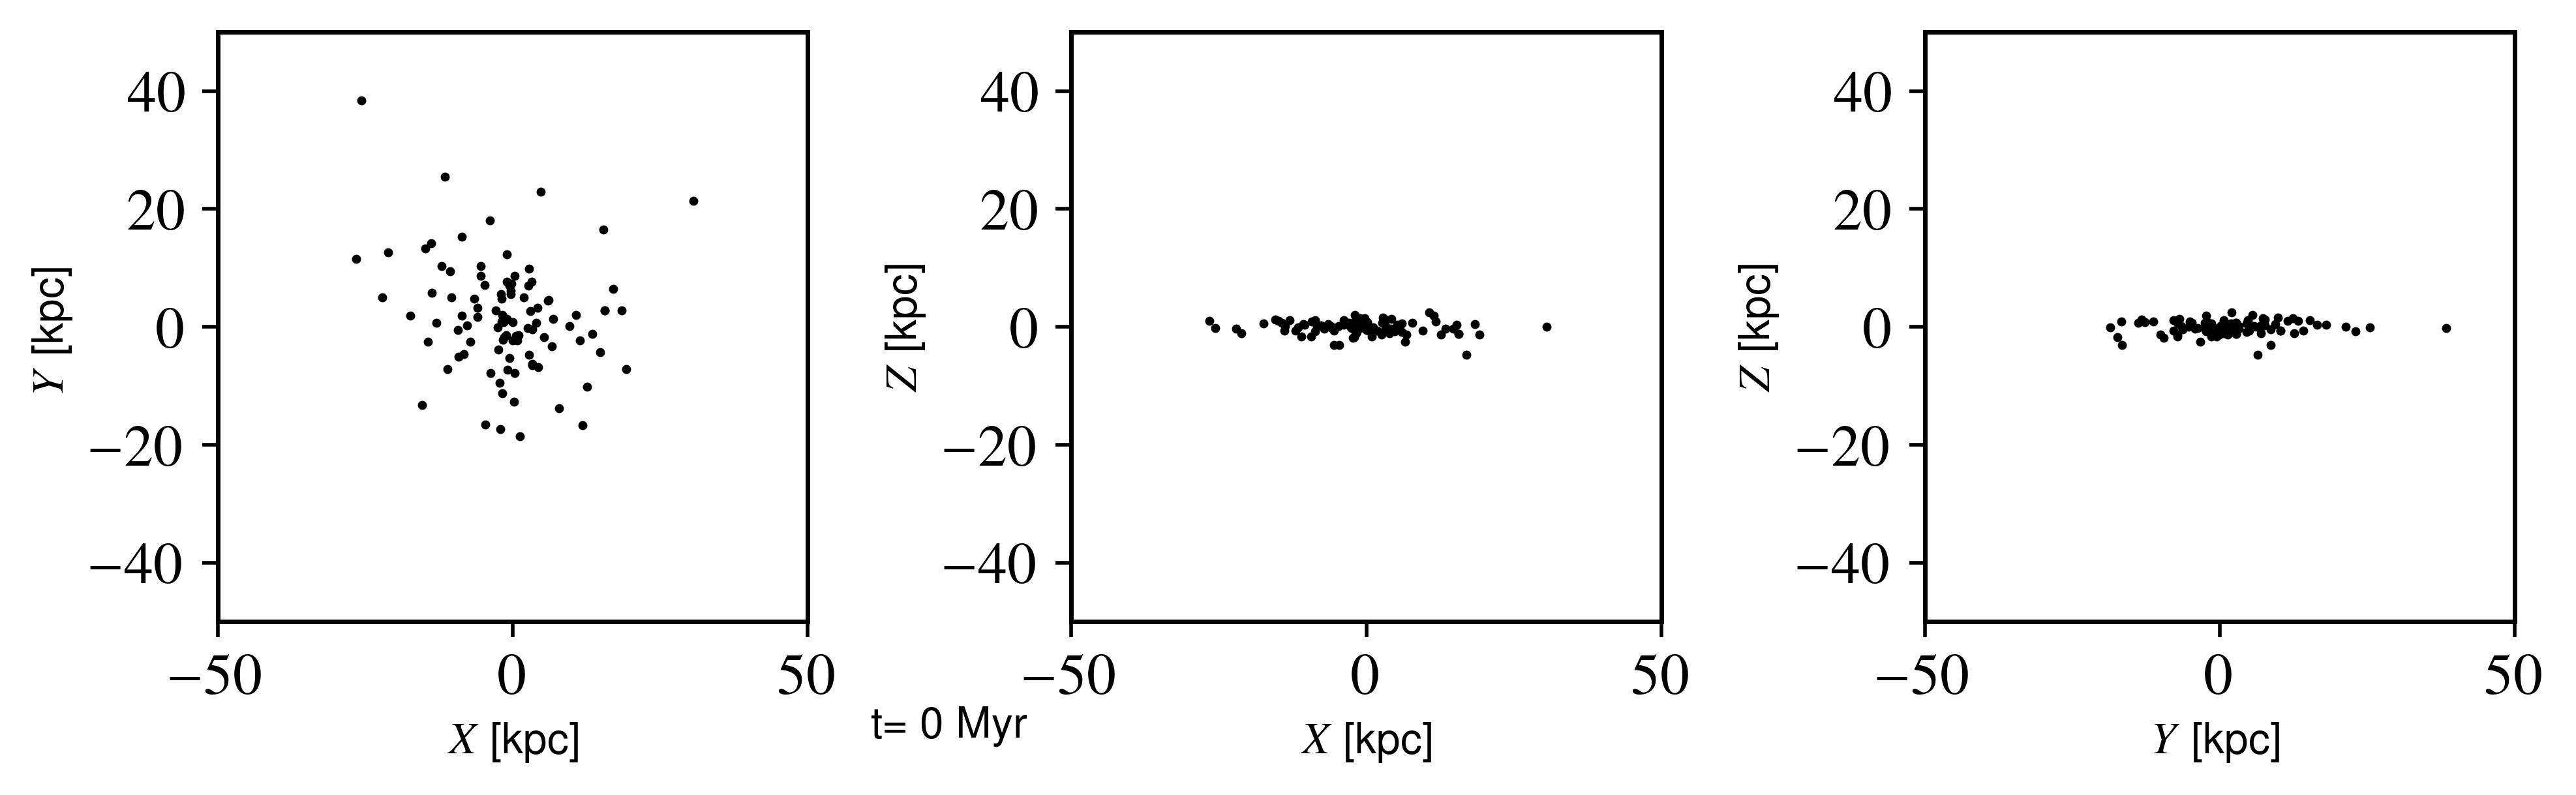

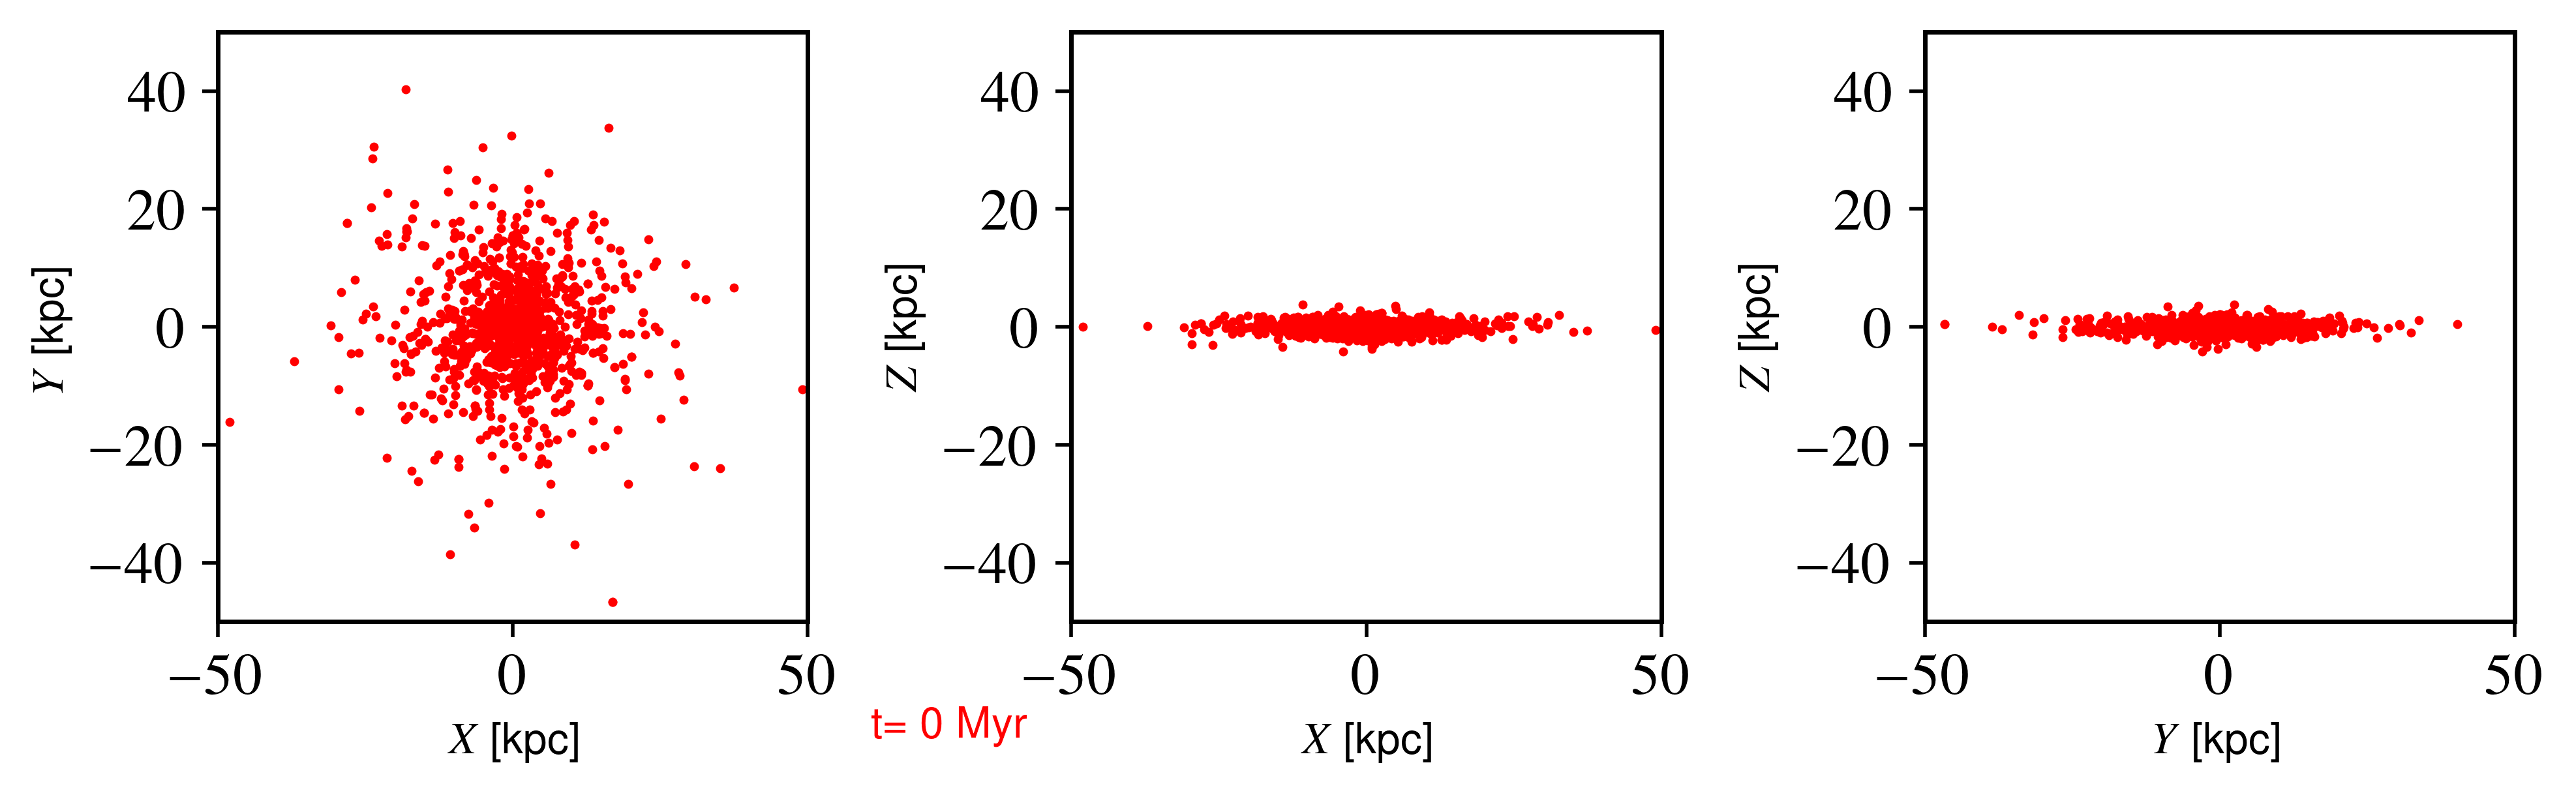

In [34]:
#Creation of the N-body simulation
simulation_10 = simulator.Nbody_simulation(dir_data_10, dir_images_10)

simulation_100 = simulator.Nbody_simulation(dir_data_100, dir_images_100)

simulation_1000 = simulator.Nbody_simulation(dir_data_1000, dir_images_1000)

#Simulation settings and initial conditions:
simulation_10.set_config(rho_0, r_c, epsilon_10, interactions, NFW, t_final, timesteps, frames, fps, video_title_10, resize, device)
simulation_10.set_visual(plot_type, ticks, color_10, markersize_10, xlim, ylim, line=True)

simulation_100.set_config(rho_0, r_c, epsilon_10, interactions, NFW, t_final, timesteps, frames, fps, video_title_100, resize, device)
simulation_100.set_visual(plot_type, ticks, color_100, markersize_100, xlim, ylim, line=False)

simulation_1000.set_config(rho_0, r_c, epsilon_10, interactions, NFW, t_final, timesteps, frames, fps, video_title_1000, resize, device)
simulation_1000.set_visual(plot_type, ticks, color_1000, markersize_1000, xlim, ylim, line=False)

### Starting simulation:

In [39]:
#Each frame is simulated and saved:
simulation_10.simulate('RK4')
simulation_10.videoMaker()

Progress: 100%|██████████| 300/300 [00:51<00:00,  5.81it/s]


['im_0.jpg', 'im_1.jpg', 'im_2.jpg', 'im_3.jpg', 'im_4.jpg', 'im_5.jpg', 'im_6.jpg', 'im_7.jpg', 'im_8.jpg', 'im_9.jpg', 'im_10.jpg', 'im_11.jpg', 'im_12.jpg', 'im_13.jpg', 'im_14.jpg', 'im_15.jpg', 'im_16.jpg', 'im_17.jpg', 'im_18.jpg', 'im_19.jpg', 'im_20.jpg', 'im_21.jpg', 'im_22.jpg', 'im_23.jpg', 'im_24.jpg', 'im_25.jpg', 'im_26.jpg', 'im_27.jpg', 'im_28.jpg', 'im_29.jpg', 'im_30.jpg', 'im_31.jpg', 'im_32.jpg', 'im_33.jpg', 'im_34.jpg', 'im_35.jpg', 'im_36.jpg', 'im_37.jpg', 'im_38.jpg', 'im_39.jpg', 'im_40.jpg', 'im_41.jpg', 'im_42.jpg', 'im_43.jpg', 'im_44.jpg', 'im_45.jpg', 'im_46.jpg', 'im_47.jpg', 'im_48.jpg', 'im_49.jpg', 'im_50.jpg', 'im_51.jpg', 'im_52.jpg', 'im_53.jpg', 'im_54.jpg', 'im_55.jpg', 'im_56.jpg', 'im_57.jpg', 'im_58.jpg', 'im_59.jpg', 'im_60.jpg', 'im_61.jpg', 'im_62.jpg', 'im_63.jpg', 'im_64.jpg', 'im_65.jpg', 'im_66.jpg', 'im_67.jpg', 'im_68.jpg', 'im_69.jpg', 'im_70.jpg', 'im_71.jpg', 'im_72.jpg', 'im_73.jpg', 'im_74.jpg', 'im_75.jpg', 'im_76.jpg', 'im_77.j

In [40]:
#Each frame is simulated and saved:
simulation_100.simulate('RK4')
simulation_100.videoMaker()

Progress: 100%|██████████| 300/300 [00:39<00:00,  7.66it/s]


['im_0.jpg', 'im_1.jpg', 'im_2.jpg', 'im_3.jpg', 'im_4.jpg', 'im_5.jpg', 'im_6.jpg', 'im_7.jpg', 'im_8.jpg', 'im_9.jpg', 'im_10.jpg', 'im_11.jpg', 'im_12.jpg', 'im_13.jpg', 'im_14.jpg', 'im_15.jpg', 'im_16.jpg', 'im_17.jpg', 'im_18.jpg', 'im_19.jpg', 'im_20.jpg', 'im_21.jpg', 'im_22.jpg', 'im_23.jpg', 'im_24.jpg', 'im_25.jpg', 'im_26.jpg', 'im_27.jpg', 'im_28.jpg', 'im_29.jpg', 'im_30.jpg', 'im_31.jpg', 'im_32.jpg', 'im_33.jpg', 'im_34.jpg', 'im_35.jpg', 'im_36.jpg', 'im_37.jpg', 'im_38.jpg', 'im_39.jpg', 'im_40.jpg', 'im_41.jpg', 'im_42.jpg', 'im_43.jpg', 'im_44.jpg', 'im_45.jpg', 'im_46.jpg', 'im_47.jpg', 'im_48.jpg', 'im_49.jpg', 'im_50.jpg', 'im_51.jpg', 'im_52.jpg', 'im_53.jpg', 'im_54.jpg', 'im_55.jpg', 'im_56.jpg', 'im_57.jpg', 'im_58.jpg', 'im_59.jpg', 'im_60.jpg', 'im_61.jpg', 'im_62.jpg', 'im_63.jpg', 'im_64.jpg', 'im_65.jpg', 'im_66.jpg', 'im_67.jpg', 'im_68.jpg', 'im_69.jpg', 'im_70.jpg', 'im_71.jpg', 'im_72.jpg', 'im_73.jpg', 'im_74.jpg', 'im_75.jpg', 'im_76.jpg', 'im_77.j

In [41]:
#Each frame is simulated and saved:
simulation_1000.simulate('RK4')
simulation_1000.videoMaker()

Progress: 100%|██████████| 300/300 [00:53<00:00,  5.64it/s]


['im_0.jpg', 'im_1.jpg', 'im_2.jpg', 'im_3.jpg', 'im_4.jpg', 'im_5.jpg', 'im_6.jpg', 'im_7.jpg', 'im_8.jpg', 'im_9.jpg', 'im_10.jpg', 'im_11.jpg', 'im_12.jpg', 'im_13.jpg', 'im_14.jpg', 'im_15.jpg', 'im_16.jpg', 'im_17.jpg', 'im_18.jpg', 'im_19.jpg', 'im_20.jpg', 'im_21.jpg', 'im_22.jpg', 'im_23.jpg', 'im_24.jpg', 'im_25.jpg', 'im_26.jpg', 'im_27.jpg', 'im_28.jpg', 'im_29.jpg', 'im_30.jpg', 'im_31.jpg', 'im_32.jpg', 'im_33.jpg', 'im_34.jpg', 'im_35.jpg', 'im_36.jpg', 'im_37.jpg', 'im_38.jpg', 'im_39.jpg', 'im_40.jpg', 'im_41.jpg', 'im_42.jpg', 'im_43.jpg', 'im_44.jpg', 'im_45.jpg', 'im_46.jpg', 'im_47.jpg', 'im_48.jpg', 'im_49.jpg', 'im_50.jpg', 'im_51.jpg', 'im_52.jpg', 'im_53.jpg', 'im_54.jpg', 'im_55.jpg', 'im_56.jpg', 'im_57.jpg', 'im_58.jpg', 'im_59.jpg', 'im_60.jpg', 'im_61.jpg', 'im_62.jpg', 'im_63.jpg', 'im_64.jpg', 'im_65.jpg', 'im_66.jpg', 'im_67.jpg', 'im_68.jpg', 'im_69.jpg', 'im_70.jpg', 'im_71.jpg', 'im_72.jpg', 'im_73.jpg', 'im_74.jpg', 'im_75.jpg', 'im_76.jpg', 'im_77.j

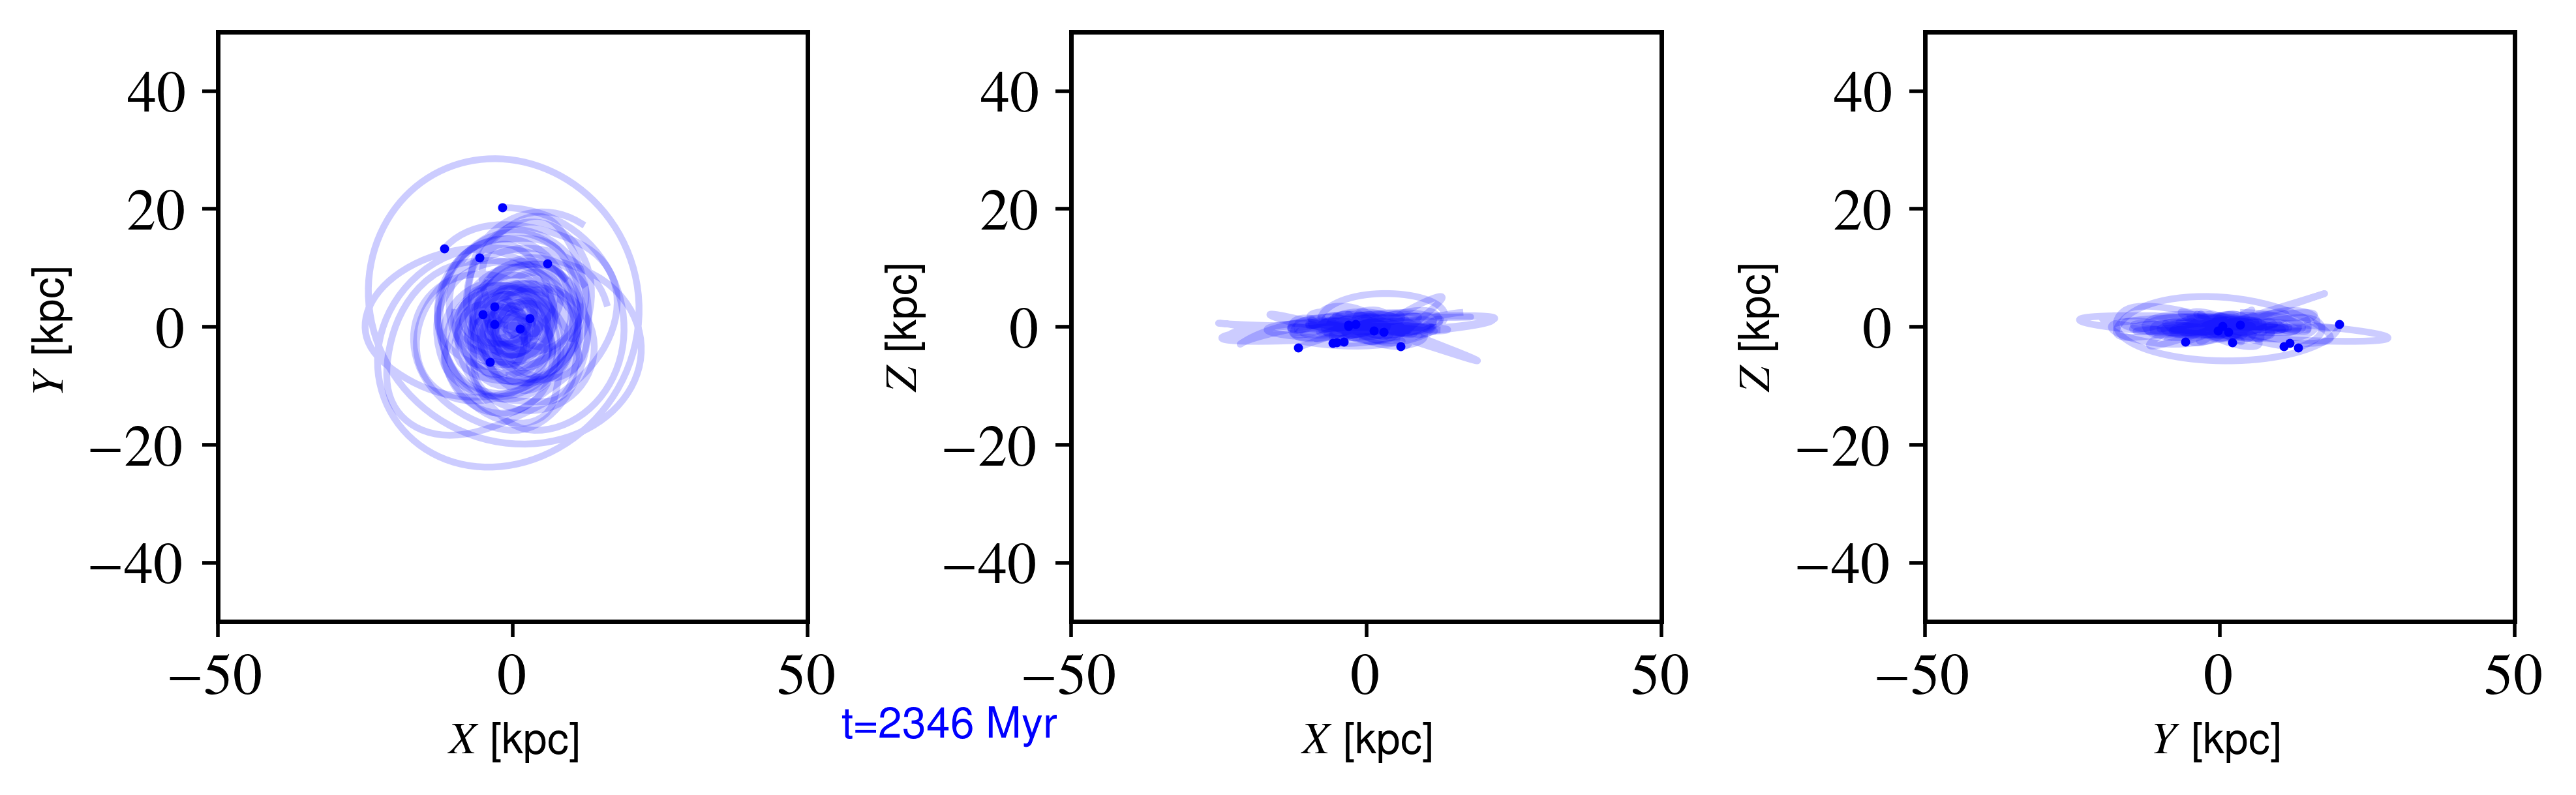

In [42]:
simulation_10.fig

In [43]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/gAtLFBQKSZE?si=oMSB0OYm3NcNa-MC" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>')

c:\ProgramData\anaconda3\lib\site-packages\IPython\core\display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Video link: [https://youtu.be/gAtLFBQKSZE](https://youtu.be/gAtLFBQKSZE)

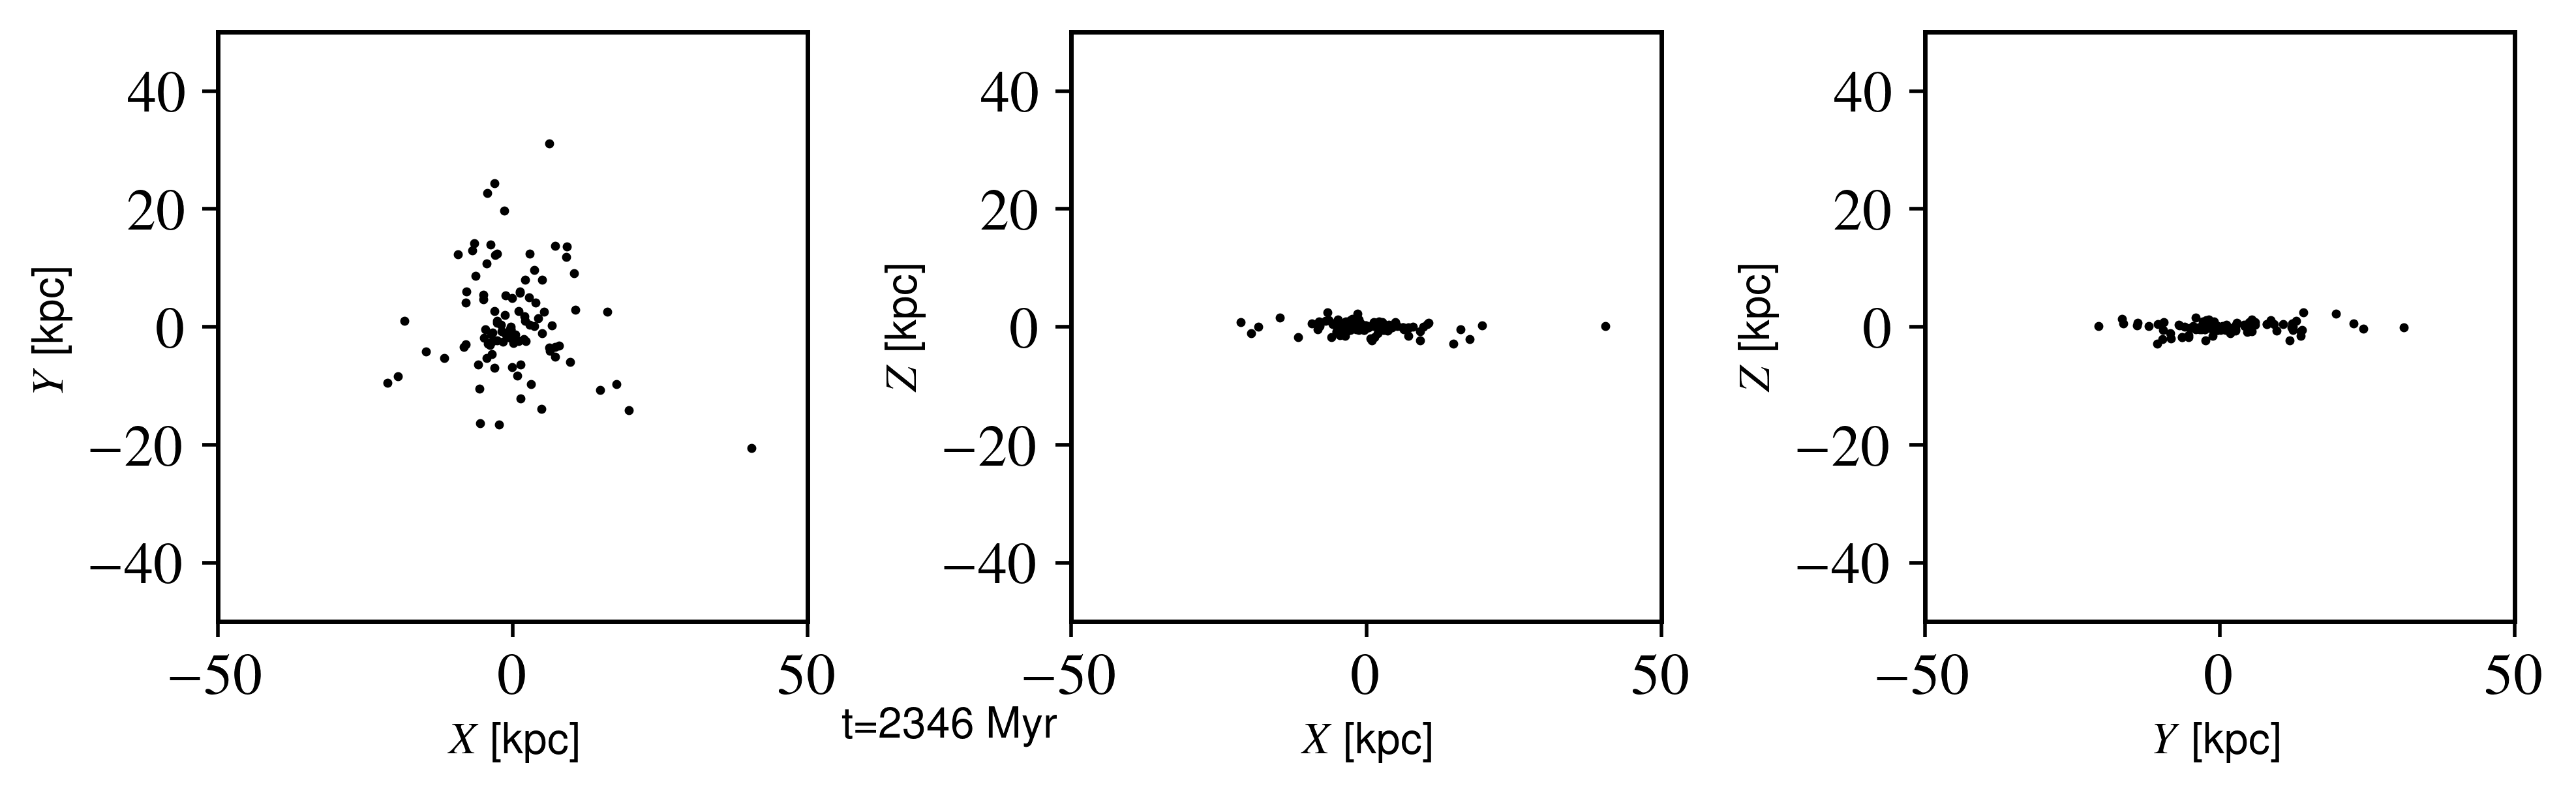

In [44]:
simulation_100.fig

In [45]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/mT-1nvGHkNY?si=ztIJsgJgw5Q4Xsy5" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>')

Video link: [https://youtu.be/mT-1nvGHkNY](https://youtu.be/mT-1nvGHkNY)

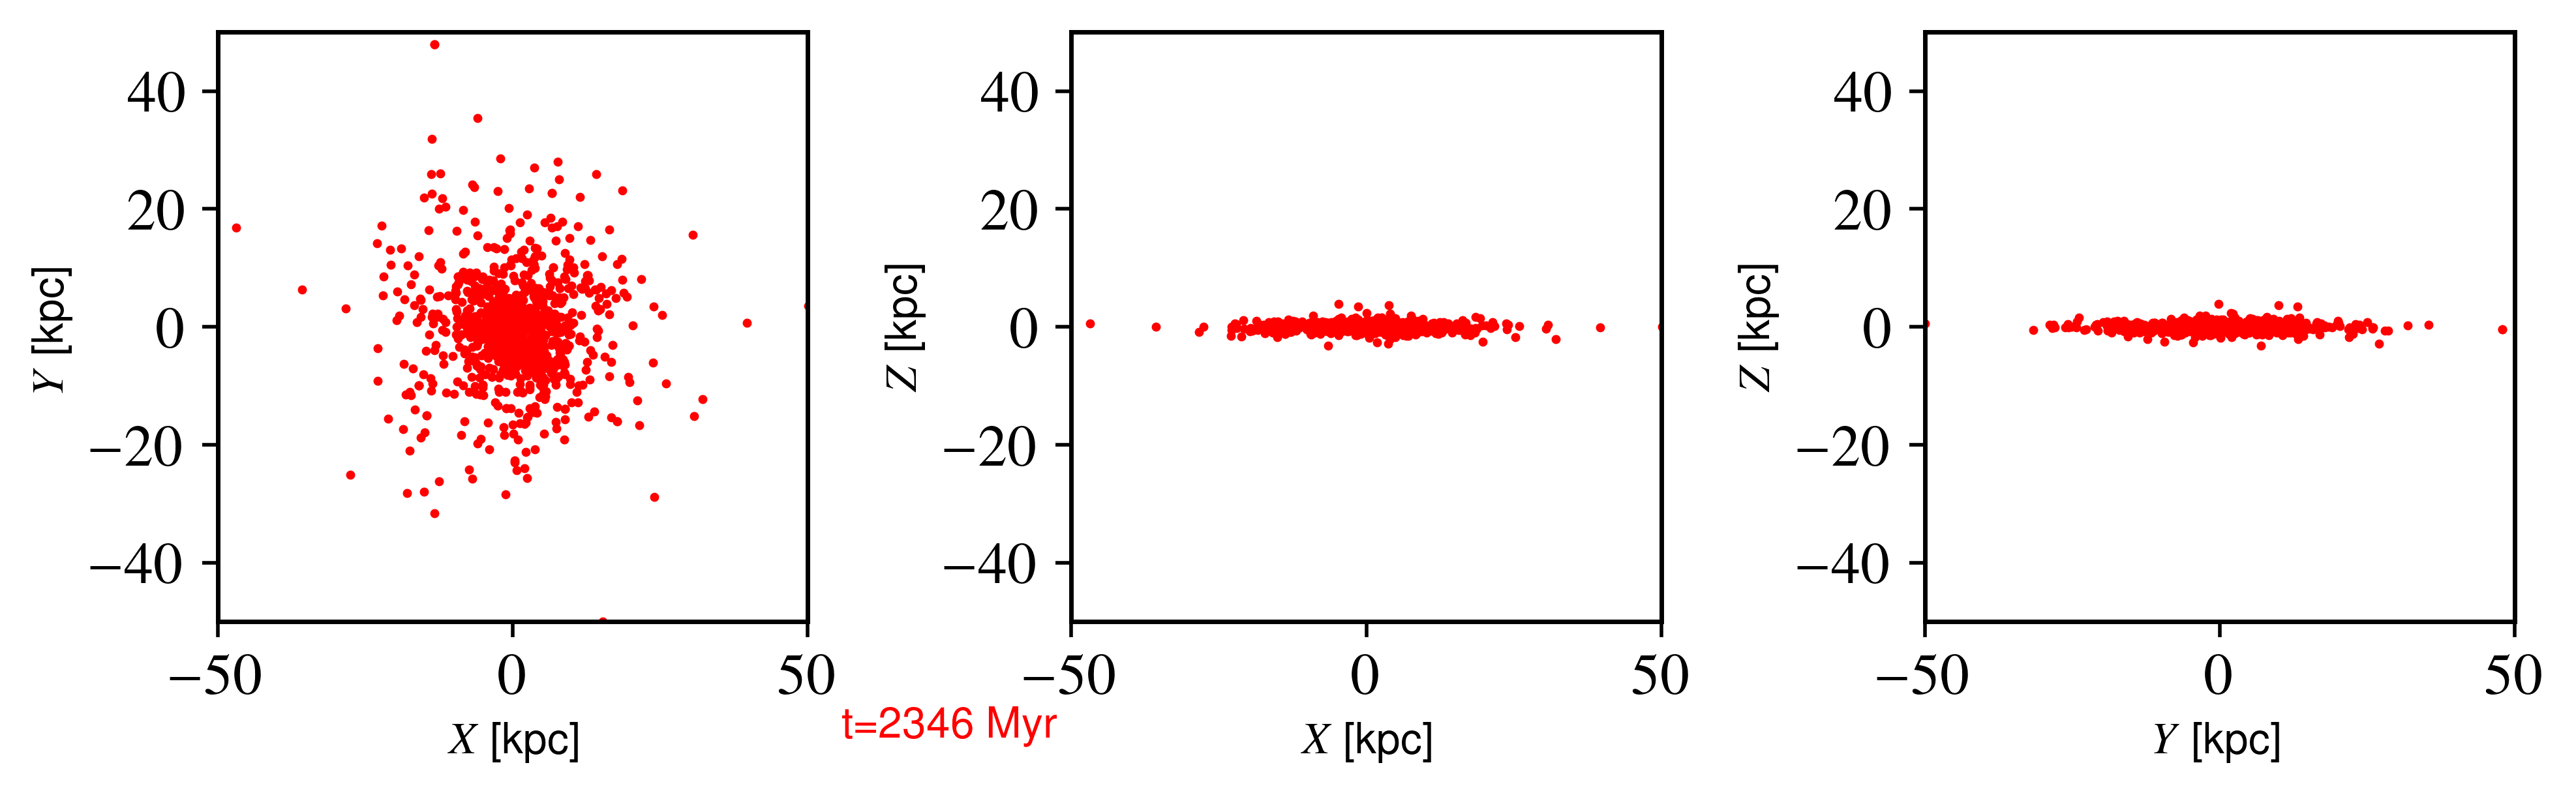

In [46]:
simulation_1000.fig

In [48]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/xpDKK88wFzM?si=oqJV1WhEyERtC6iK" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>')

Video link: [https://youtu.be/xpDKK88wFzM](https://youtu.be/xpDKK88wFzM)

It is clearly visible how the interaction changes the orbits of the particles, especially in the inner regions.

A softening length has been added. This is because when two particles are very close, the acceleration due to interactions can diverge and an extremely high value can be obtained. A softening length is added to smooth out these interactions and also to avoid division by 0 when two particles are in the same position. 

Reducing the softening length increases the resolution in the simulation, which is more necessary as the number of particles increases. One must find a balance between a small softening length to improve resolution but not small enough to introduce instabilities and numerical problems.

In [49]:
del simulation
del simulation_10
del simulation_100
del simulation_1000

### Running time:

In this section, I will analyze the dependency of execution time on the number of particles in each simulation as before.

For this purpose the same initial conditions as in the previous running time are used. Now, the interactions between particles is activate.

In [50]:
dir_data = [time_test_files+file for file in os.listdir(time_test_files) if file.endswith('time_test.txt')]
dir_data.sort(key=lambda x: int(x.split("N")[-1].split("_")[0]))

dir_images = './images/images_trash/' 
video_title = 'times'

In [51]:
torch.cuda.empty_cache()
rho_0 = 5932371.0 
r_c = 20.0  
epsilon=1
frames = 1
fps=30
resize=1
plot_type='triple_2D'
ticks='yes'
color='black'
markersize=1
xlim, ylim = 30, 30
timesteps= 1000
t_final = 2
interactions = True
NFW = True

ex_time = np.empty(len(dir_data))
for i in tqdm(range(len(dir_data)), desc="Total progress"):
    simulation = simulator.Nbody_simulation(dir_data[i], dir_images)
    simulation.set_config(rho_0, r_c, epsilon, interactions, NFW, t_final, timesteps, frames, fps, video_title, resize, device)
    simulation.set_visual(plot_type, ticks, color, markersize, xlim, ylim, line=False)
    plt.close()
    
    simulation.simulate('RK4')
    ex_time[i] = simulation.execution_time
    
    del simulation
    torch.cuda.empty_cache()   #to properly clear the GPU memory (Python only does it for the memory used by the CPU.) 

Total progress: 100%|██████████| 32/32 [01:56<00:00,  3.65s/it]


### WARNING!

The following cell takes a considerable amount of time to execute (~20 min on my system). It is recommended to view the results first before running it (if desired).

In [52]:
ex_time_cpu = np.empty(len(dir_data))
for i in tqdm(range(len(dir_data)), desc="Total progress"):
    simulation = simulator.Nbody_simulation(dir_data[i], dir_images)
    simulation.set_config(rho_0, r_c, epsilon, interactions, NFW, t_final, timesteps, frames, fps, video_title, resize, 'cpu')
    simulation.set_visual(plot_type, ticks, color, markersize, xlim, ylim, line=False)
    plt.close()
    
    simulation.simulate('RK4')
    ex_time_cpu[i] = simulation.execution_time
    
    del simulation

Total progress: 100%|██████████| 32/32 [18:42<00:00, 35.08s/it] 


Text(0, 0.5, 'Execution time [s]')

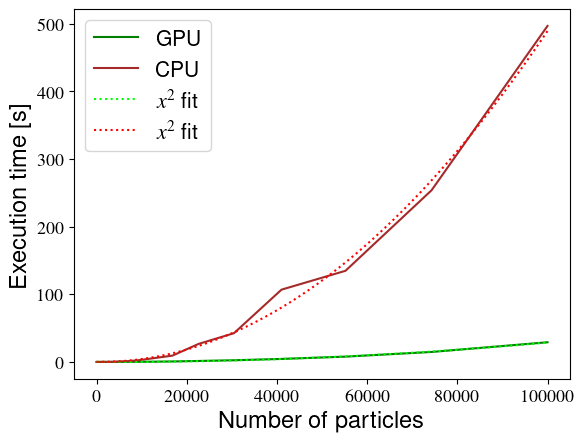

In [53]:
plt.plot(n_simulations, ex_time, color='green', label='GPU')
# plt.xscale('log')
# plt.yscale('log')
plt.plot(n_simulations, ex_time_cpu, color='brown', label='CPU')
fit = np.polyfit(n_simulations, ex_time, 2)
plt.plot(np.arange(n_simulations[0], n_simulations[-1]), np.polyval(fit, np.arange(n_simulations[0], n_simulations[-1])), ':', color='lime', label='$x^2$ fit')
fit_cpu = np.polyfit(n_simulations, ex_time_cpu, 2)
plt.plot(np.arange(n_simulations[0], n_simulations[-1]), np.polyval(fit_cpu, np.arange(n_simulations[0], n_simulations[-1])), ':', color='red', label='$x^2$ fit')
plt.legend(fontsize=16)
plt.xlabel('Number of particles', fontsize=18)
plt.ylabel('Execution time [s]', fontsize=18)

Text(0, 0.5, 'Execution time [s]')

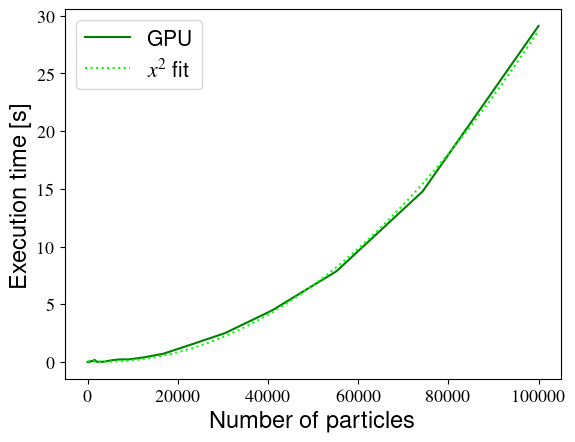

In [54]:
plt.plot(n_simulations, ex_time, color='green', label='GPU')
plt.plot(np.arange(n_simulations[0], n_simulations[-1]), np.polyval(fit, np.arange(n_simulations[0], n_simulations[-1])), ':', color='lime', label='$x^2$ fit')
plt.legend(fontsize=16)
plt.xlabel('Number of particles', fontsize=18)
plt.ylabel('Execution time [s]', fontsize=18)

In this case, both with the GPU and with the CPU, there is a quadratic dependence in th execution time with the number of particles. 

Comparing simulations with CPU and GPU, the improvement when using the GPU is amazing. More than one order of magnitude of improvement in time is obtained (more important when increase the number of particles). This demonstrates that GPUs are highly efficient in performing calculations like these. Additionally, by not introducing an explicit double loop to iterate over particles, it is feasible to even perform simulations with >1000 particles using the CPU. This would be highly challenging with a double loop. It is thus demonstrated that an efficient code with a wider range of aplicability has been developed

## EXTRAS

## Milky Way Disk (100,000 particles)

100k particles are generated following a radial exponential profile. The stars have a initial circular velocity corresponding to the NFW potential used previously. The total mass is the same ($5\times10^{10} {\rm M_\odot}$). It is used a heights dispersion corresponding to a Gaussian centered at 0 and with a sigma of 0.3 kpc (attempting to simulate the scale height of the thin disk, (Jurić et al., 2008)).

In [61]:
ic = ic_gen.ic(100000, './ics/disk_N100k.txt')
ic.NFW(rho_0, r_c, 5e10, 0.3, 10)
ic.save_file()

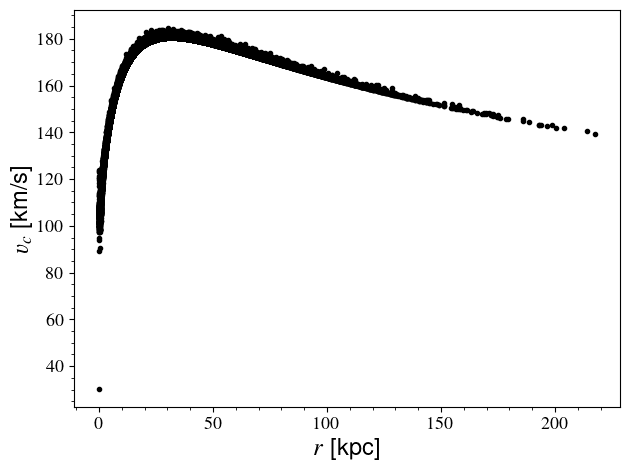

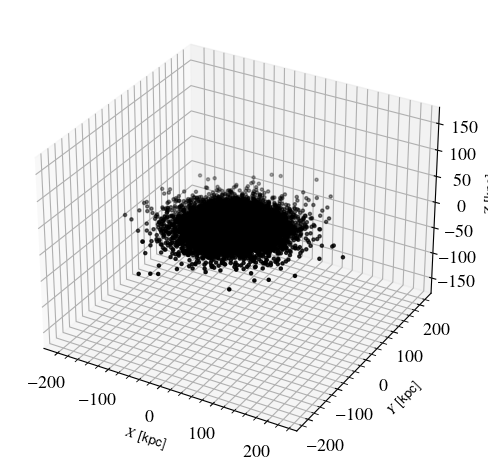

(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='$X$ [kpc]', ylabel='$Y$ [kpc]', zlabel='$Z$ [kpc]'>)

In [62]:
ic.v_curve()
ic.xyz()

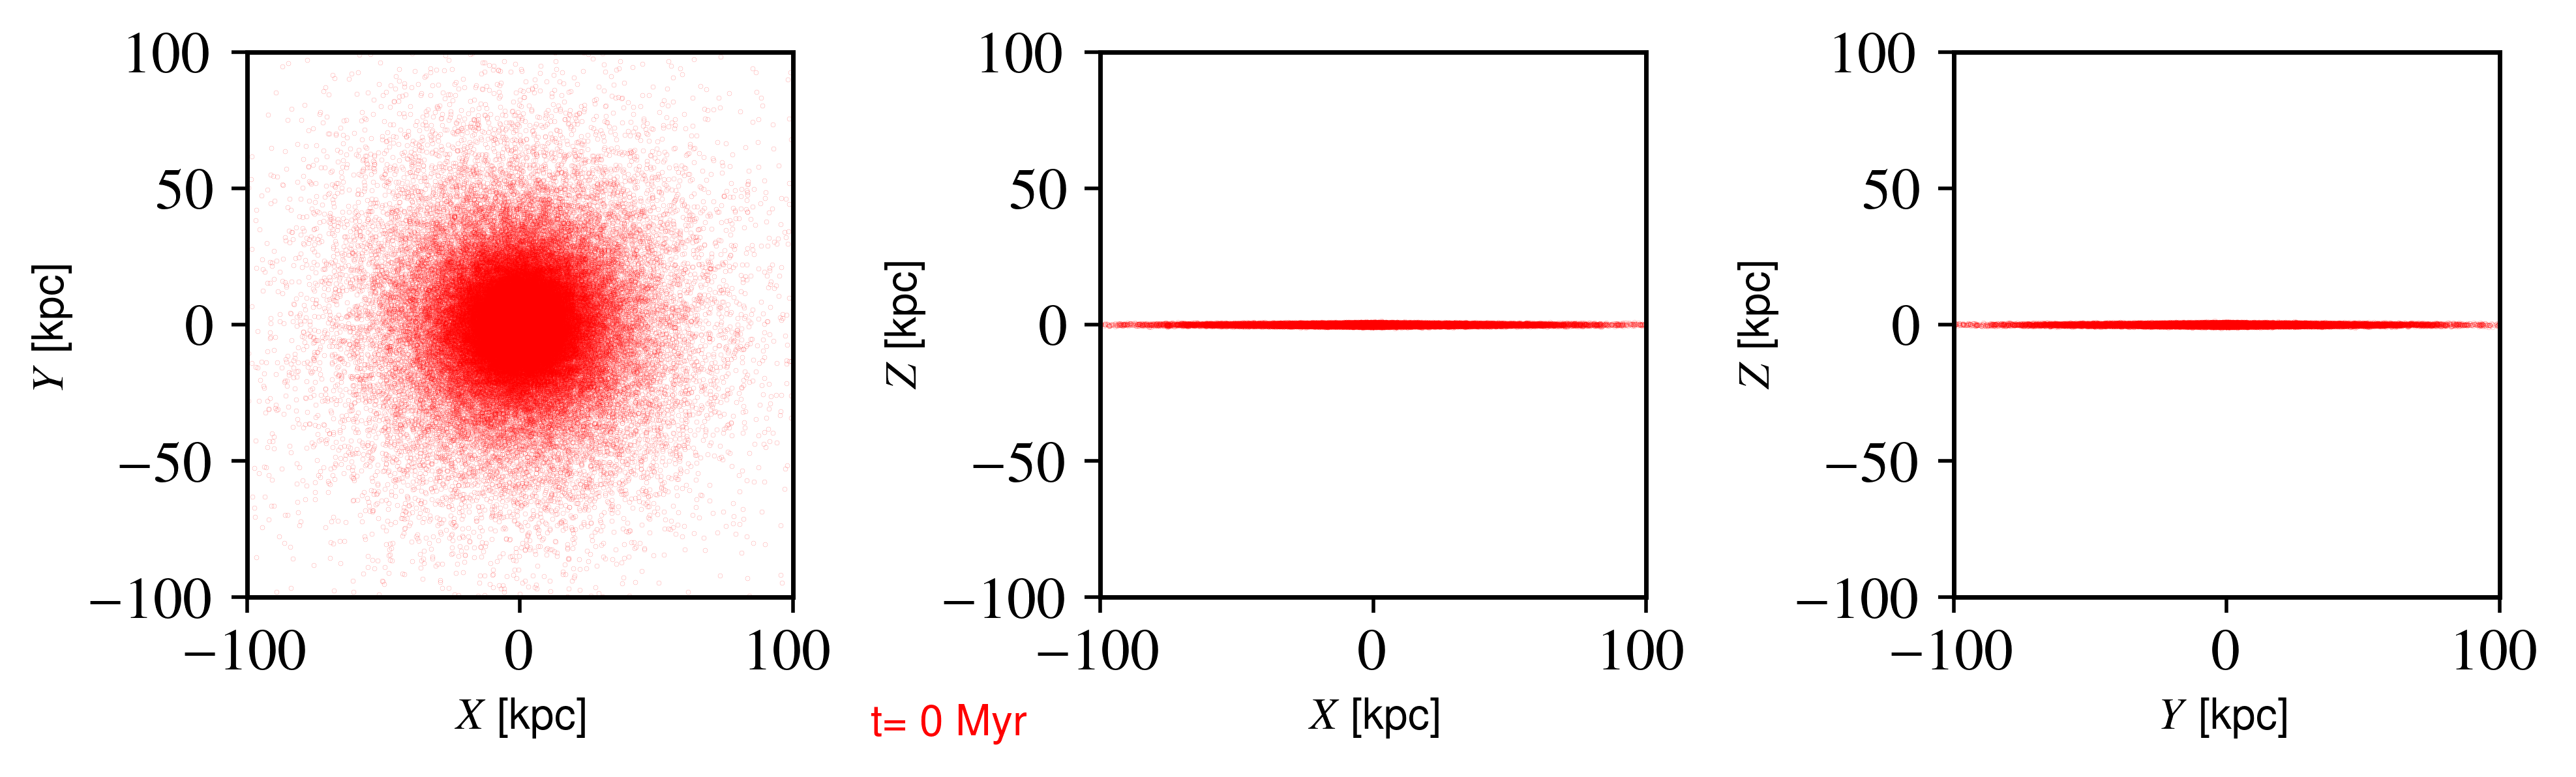

In [71]:
dir_data = './ics/disk_N100k.txt'

#3 plots or 1 ('single_2D, 'triple_2D', 'single_3D):
plot_type = 'triple_2D'
ticks = 'yes'  
color = 'red' 
markersize = 0.1

interactions=True
NFW =True

rho_0 = 5932371.0 #[M_sun / kpc^3]
r_c = 20.0  #Scale length [kpc]

epsilon=0.1
t_final =1.5
timesteps=500

xlim = 100.0
ylim = 100.0

#Directory where the images will be saved:
dir_images = './images/images_disk_N100k'
#Title of the video:
video_title = './videos/disk_N100k'
#Frames per second of the video:
fps = 30
#Number of frames in the video (it can not be larger than the timesteps of the simulation):
frames = 300
#Scale factor of the images (it is recommended to keep it at 1 unless the video consumes excessive memory):
resize = 1
simulation = simulator.Nbody_simulation(dir_data, dir_images)
simulation.set_config(rho_0, r_c, epsilon, interactions, NFW, t_final, timesteps, frames, fps, video_title, resize, device)
simulation.set_visual(plot_type, ticks, color, markersize, xlim, ylim, line=False, alpha=0.5) 

### WARNING!

The following cell is extremely slow to execute (6 hours on my system). It is recommended not to run it. Previously, it has been observed that the execution time of the simulation with 100k particles is ~30 s. Indicating that the limiting factor here is the plotting and saving process. It takes ~70 s to generate each frame, with ~10 s for calculations and ~60 s to update and save the plot. By improving this aspect, a code that generates simulations of 100k particles in seconds could be obtained.

In [73]:
simulation.simulate('RK4')
simulation.videoMaker()

Progress: 100%|██████████| 300/300 [5:59:45<00:00, 71.95s/it]  


['im_0.jpg', 'im_1.jpg', 'im_2.jpg', 'im_3.jpg', 'im_4.jpg', 'im_5.jpg', 'im_6.jpg', 'im_7.jpg', 'im_8.jpg', 'im_9.jpg', 'im_10.jpg', 'im_11.jpg', 'im_12.jpg', 'im_13.jpg', 'im_14.jpg', 'im_15.jpg', 'im_16.jpg', 'im_17.jpg', 'im_18.jpg', 'im_19.jpg', 'im_20.jpg', 'im_21.jpg', 'im_22.jpg', 'im_23.jpg', 'im_24.jpg', 'im_25.jpg', 'im_26.jpg', 'im_27.jpg', 'im_28.jpg', 'im_29.jpg', 'im_30.jpg', 'im_31.jpg', 'im_32.jpg', 'im_33.jpg', 'im_34.jpg', 'im_35.jpg', 'im_36.jpg', 'im_37.jpg', 'im_38.jpg', 'im_39.jpg', 'im_40.jpg', 'im_41.jpg', 'im_42.jpg', 'im_43.jpg', 'im_44.jpg', 'im_45.jpg', 'im_46.jpg', 'im_47.jpg', 'im_48.jpg', 'im_49.jpg', 'im_50.jpg', 'im_51.jpg', 'im_52.jpg', 'im_53.jpg', 'im_54.jpg', 'im_55.jpg', 'im_56.jpg', 'im_57.jpg', 'im_58.jpg', 'im_59.jpg', 'im_60.jpg', 'im_61.jpg', 'im_62.jpg', 'im_63.jpg', 'im_64.jpg', 'im_65.jpg', 'im_66.jpg', 'im_67.jpg', 'im_68.jpg', 'im_69.jpg', 'im_70.jpg', 'im_71.jpg', 'im_72.jpg', 'im_73.jpg', 'im_74.jpg', 'im_75.jpg', 'im_76.jpg', 'im_77.j

In [5]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/0cTNpfKIjWI?si=gVYnKeJJeHUtjiwM" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>')

c:\ProgramData\anaconda3\lib\site-packages\IPython\core\display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Video link: [https://youtu.be/0cTNpfKIjWI](https://youtu.be/0cTNpfKIjWI)

In this simulation, it can be seen that the inner region is not entirely stable (even including the mass of the stars). The stars in this region do not follow circular orbits. This is probably due to that the initial velocity in the center is lower than it should be. Because this, stars in the center can not orbit circularly and they approach to the center. So, they begin to orbit with high eccentricity, also increasing the $Z$ component. This initial instability causes something similar to spiral arms at the beginning of the simulation.

## Milky Way Disk + Bulge (30,000 particles)

20k particles are generated following a radial exponential profile as in the previous example. Now, a uniform sphere of 10k particles has been added to simulate a galactic bulge. The initial velocities of the bulge correspond to circular velocities caused by dark matter and the mass of the stars in the center.

In [74]:
ic = ic_gen.ic(20000, './ics/disk_bulge_N30k.txt')
ic.NFW(rho_0, r_c, 5e10, 0.9, 10)
ic.uni_sphere(3, rho_0, r_c, 20e6, N=10000)
ic.save_file()

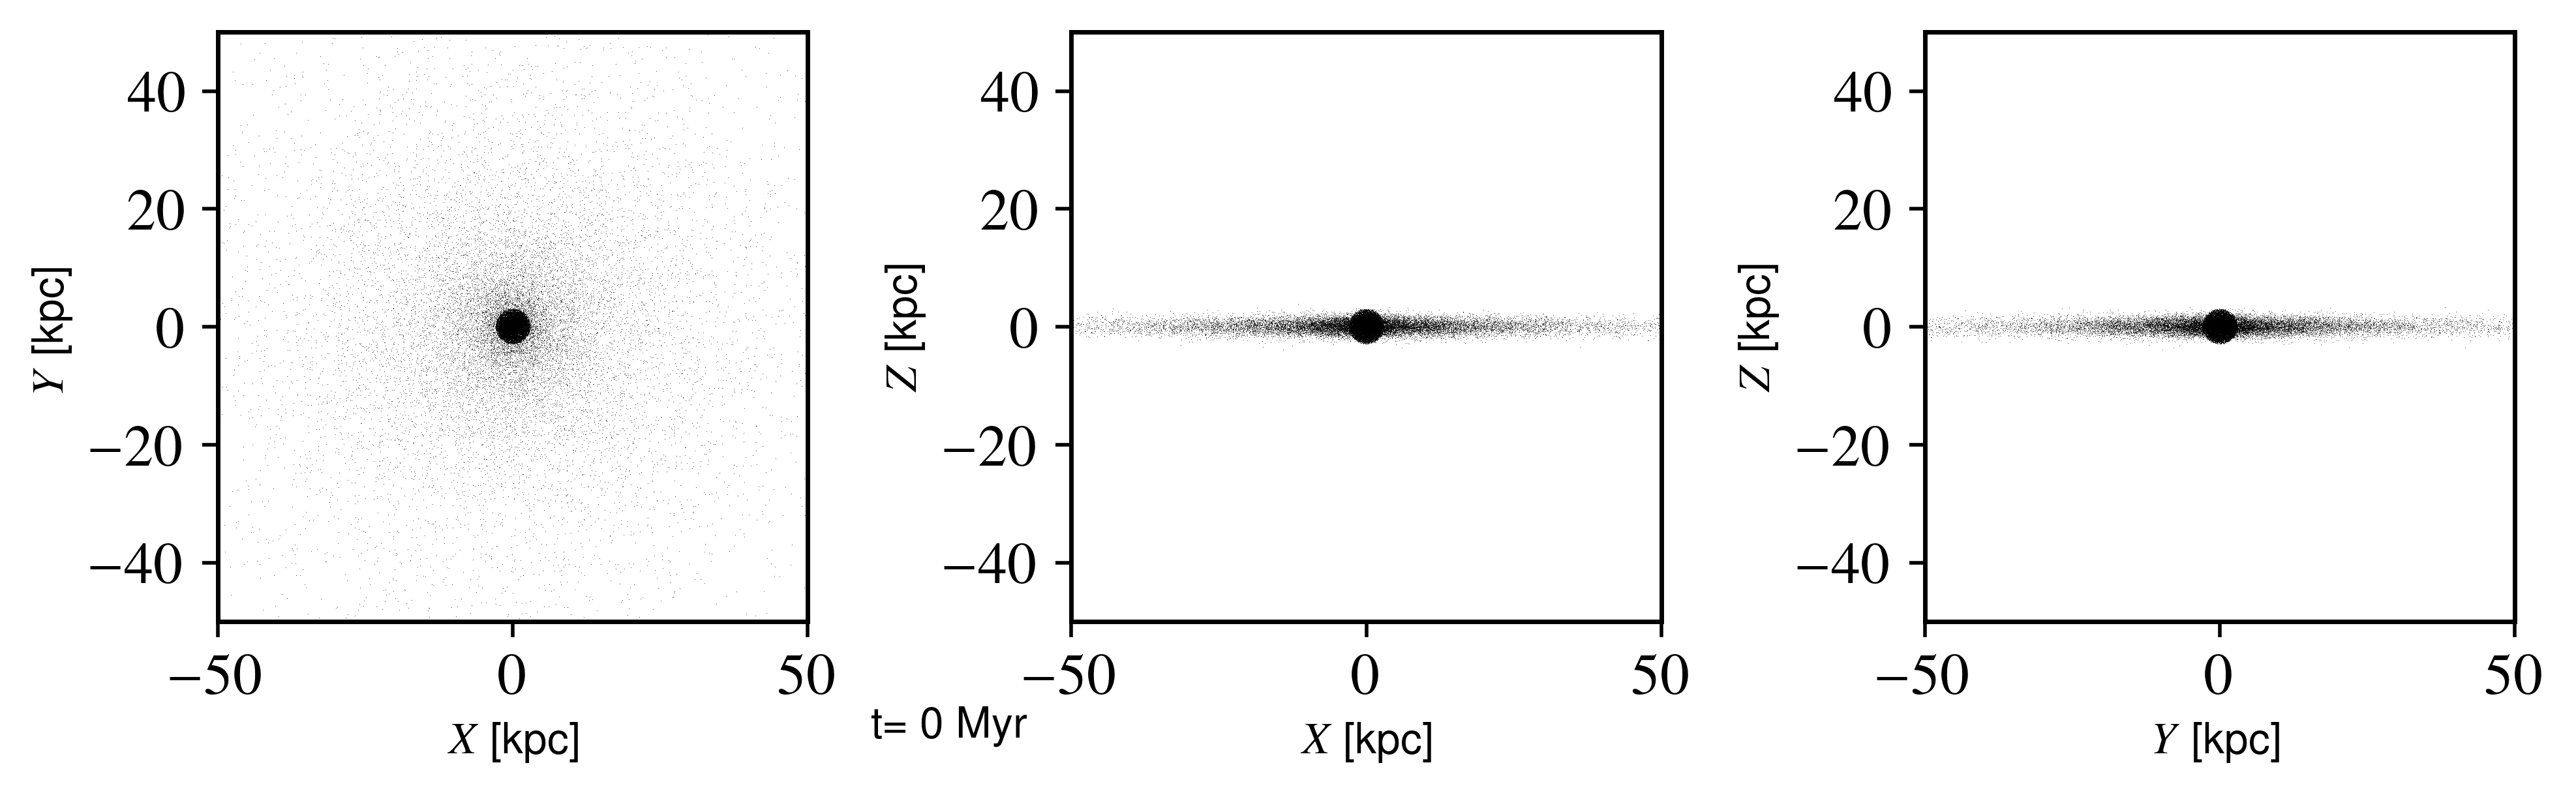

In [75]:
torch.cuda.empty_cache()
dir_data = './ics/disk_bulge_N30k.txt'

#3 plots or 1 ('single_2D, 'triple_2D', 'single_3D):
plot_type = 'triple_2D'
ticks = 'yes'  
color = 'black' 
markersize = 0.1

interactions=True
NFW =True

rho_0 = 5932371.0 #[M_sun / kpc^3]
r_c = 20.0  #Scale length [kpc]

epsilon=0.01
t_final =1.5
timesteps=500

xlim = 50.0
ylim = 50.0

#Directory where the images will be saved:
dir_images = './images/images_disk_bulge_N30k'
#Title of the video:
video_title = './videos/disk_bulge20k'
#Frames per second of the video:
fps = 30
#Number of frames in the video (it can not be larger than the timesteps of the simulation):
frames = 300
#Scale factor of the images (it is recommended to keep it at 1 unless the video consumes excessive memory):
resize = 1
simulation = simulator.Nbody_simulation(dir_data, dir_images)
simulation.set_config(rho_0, r_c, epsilon, interactions, NFW, t_final, timesteps, frames, fps, video_title, resize, device)
simulation.set_visual(plot_type, ticks, color, markersize, xlim, ylim, line=False, marker=',', alpha=0.7) 

### WARNING!

The following cell is slow to execute (40 min on my system). As previously, the limiting factor here is the plotting and saving process.

In [76]:
simulation.simulate('RK4')
simulation.videoMaker()

Progress: 100%|██████████| 300/300 [38:56<00:00,  7.79s/it]


['im_0.jpg', 'im_1.jpg', 'im_2.jpg', 'im_3.jpg', 'im_4.jpg', 'im_5.jpg', 'im_6.jpg', 'im_7.jpg', 'im_8.jpg', 'im_9.jpg', 'im_10.jpg', 'im_11.jpg', 'im_12.jpg', 'im_13.jpg', 'im_14.jpg', 'im_15.jpg', 'im_16.jpg', 'im_17.jpg', 'im_18.jpg', 'im_19.jpg', 'im_20.jpg', 'im_21.jpg', 'im_22.jpg', 'im_23.jpg', 'im_24.jpg', 'im_25.jpg', 'im_26.jpg', 'im_27.jpg', 'im_28.jpg', 'im_29.jpg', 'im_30.jpg', 'im_31.jpg', 'im_32.jpg', 'im_33.jpg', 'im_34.jpg', 'im_35.jpg', 'im_36.jpg', 'im_37.jpg', 'im_38.jpg', 'im_39.jpg', 'im_40.jpg', 'im_41.jpg', 'im_42.jpg', 'im_43.jpg', 'im_44.jpg', 'im_45.jpg', 'im_46.jpg', 'im_47.jpg', 'im_48.jpg', 'im_49.jpg', 'im_50.jpg', 'im_51.jpg', 'im_52.jpg', 'im_53.jpg', 'im_54.jpg', 'im_55.jpg', 'im_56.jpg', 'im_57.jpg', 'im_58.jpg', 'im_59.jpg', 'im_60.jpg', 'im_61.jpg', 'im_62.jpg', 'im_63.jpg', 'im_64.jpg', 'im_65.jpg', 'im_66.jpg', 'im_67.jpg', 'im_68.jpg', 'im_69.jpg', 'im_70.jpg', 'im_71.jpg', 'im_72.jpg', 'im_73.jpg', 'im_74.jpg', 'im_75.jpg', 'im_76.jpg', 'im_77.j

In [7]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/LeZJ2VqY3mA?si=r4p1OTaZqhmwhXwn" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>')

Video link: [https://youtu.be/LeZJ2VqY3mA](https://youtu.be/LeZJ2VqY3mA)

In this simulation, the bulge is also not stable initially due to the same reason as in the disk. But it quickly virializes. There are some small oscillations due to this, but the 'galaxy' remains stable.

## Milky Way Disk + Merger (21,000 particles)

10k particles are generated following a radial exponential profile as in the previous example (to form a disk). Now, a small disk is added with an inclination. In the simulation, the dark matter of this small disk is not taken into account. It is also not considered then generating the initial velocities, so it is expected that this small disk will quickly disperse. This situation does not seem very realistic but it is done for fun.

In [6]:
ic = ic_gen.ic(10000, './ics/disk_merger_N20k.txt')
ic.NFW(rho_0, r_c, 5e10, 0.3, 10)
ic.NFW(rho_0, r_c/2, 2.5e10, 0.3, 10, 1000, r_0=75, z_0=75, rot=45)
ic.save_file()

c:\ProgramData\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:210: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array([xs, ys, zs, np.ones_like(xs)])
c:\ProgramData\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:210: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys, zs, np.ones_like(xs)])
c:\ProgramData\anacond

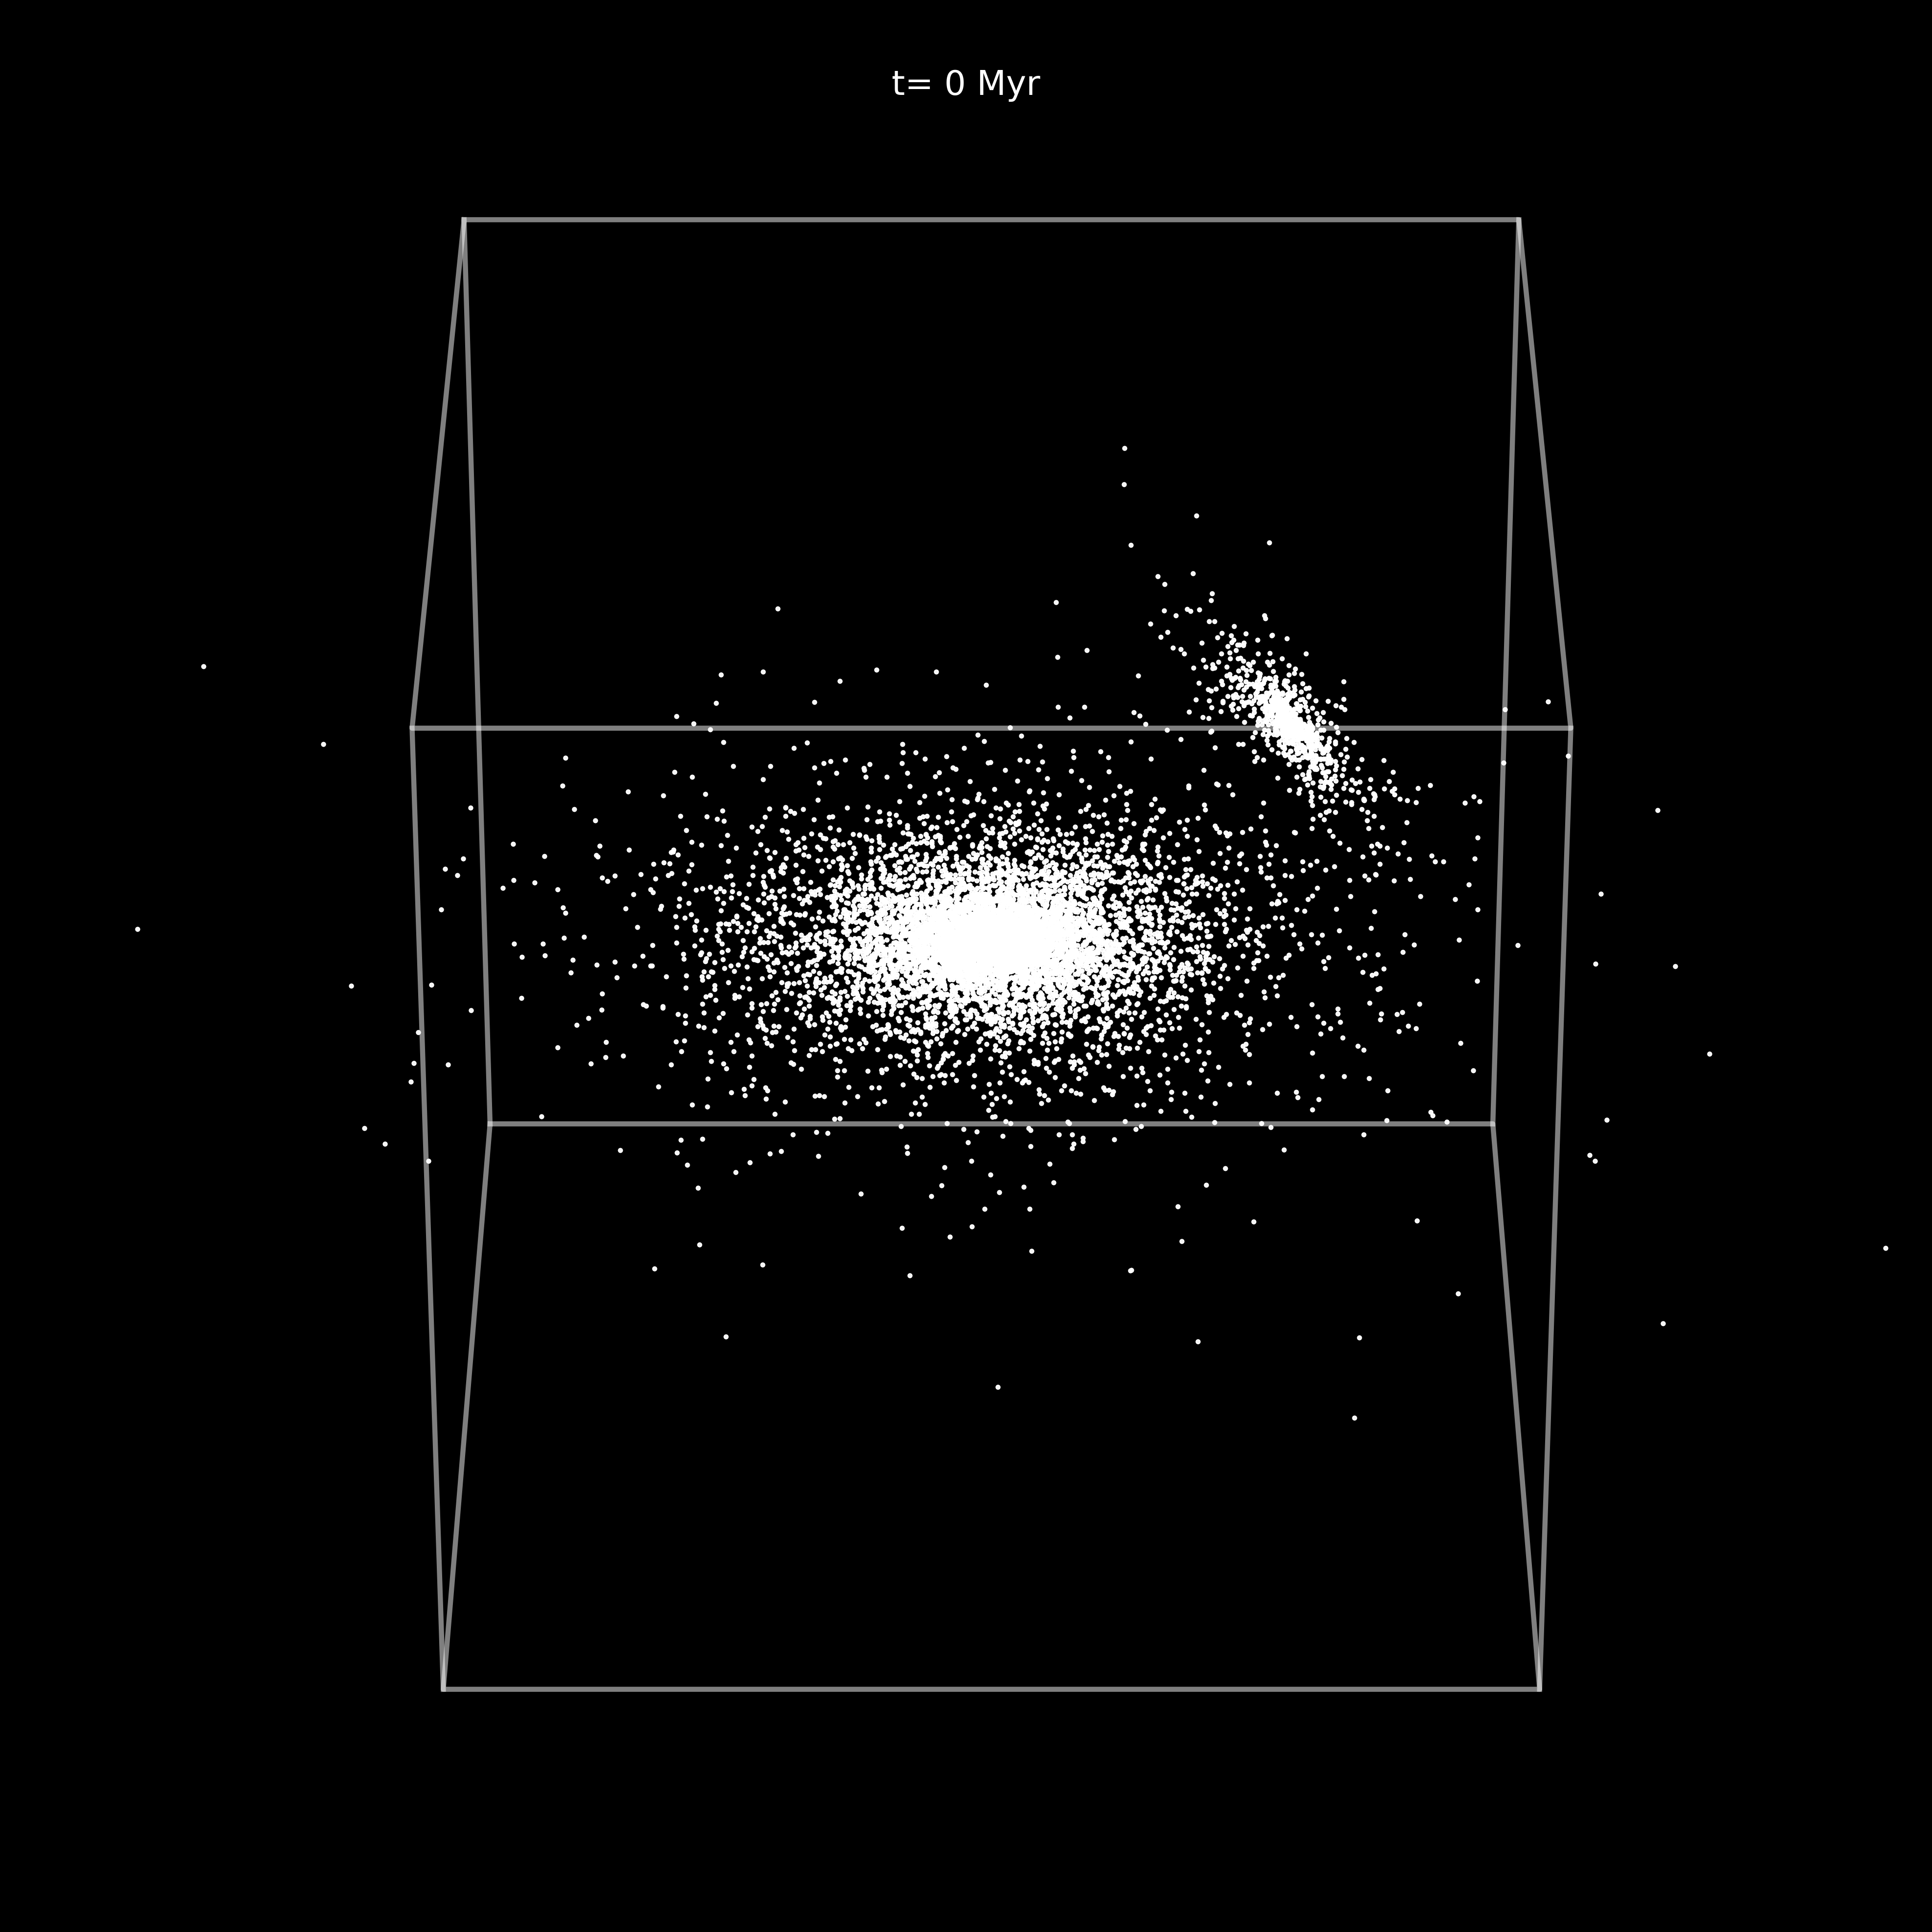

In [13]:
dir_data = './ics/disk_merger_N20k.txt'

#3 plots or 1 ('single_2D, 'triple_2D', 'single_3D):
plot_type = 'single_3D'
ticks = 'no'  
color = 'white' 
markersize = 1

interactions=True
NFW =True

rho_0 = 5932371.0 #[M_sun / kpc^3]
r_c = 20.0  #Scale length [kpc]

epsilon=0.1
t_final =10
timesteps=1500

xlim = 100.0
ylim = 100.0

#Directory where the images will be saved:
dir_images = './images/images_disk_merger_N20k'
#Title of the video:
video_title = './videos/disk_merger_N20k'
#Frames per second of the video:
fps = 30
#Number of frames in the video (it can not be larger than the timesteps of the simulation):
frames = 600
#Scale factor of the images (it is recommended to keep it at 1 unless the video consumes excessive memory):
resize = 1
simulation = simulator.Nbody_simulation(dir_data, dir_images)
simulation.set_config(rho_0, r_c, epsilon, interactions, NFW, t_final, timesteps, frames, fps, video_title, resize, device)
simulation.set_visual(plot_type, ticks, color, markersize, xlim, ylim, line=False) 

### WARNING!

The following cell is slow to execute (20 min on my system). As previously, the limiting factor here is the plotting and saving process.

In [14]:
simulation.simulate('RK4')
simulation.videoMaker()

Progress:   0%|          | 0/600 [00:00<?, ?it/s]c:\ProgramData\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:210: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array([xs, ys, zs, np.ones_like(xs)])
c:\ProgramData\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:210: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, 

['im_0.jpg', 'im_1.jpg', 'im_2.jpg', 'im_3.jpg', 'im_4.jpg', 'im_5.jpg', 'im_6.jpg', 'im_7.jpg', 'im_8.jpg', 'im_9.jpg', 'im_10.jpg', 'im_11.jpg', 'im_12.jpg', 'im_13.jpg', 'im_14.jpg', 'im_15.jpg', 'im_16.jpg', 'im_17.jpg', 'im_18.jpg', 'im_19.jpg', 'im_20.jpg', 'im_21.jpg', 'im_22.jpg', 'im_23.jpg', 'im_24.jpg', 'im_25.jpg', 'im_26.jpg', 'im_27.jpg', 'im_28.jpg', 'im_29.jpg', 'im_30.jpg', 'im_31.jpg', 'im_32.jpg', 'im_33.jpg', 'im_34.jpg', 'im_35.jpg', 'im_36.jpg', 'im_37.jpg', 'im_38.jpg', 'im_39.jpg', 'im_40.jpg', 'im_41.jpg', 'im_42.jpg', 'im_43.jpg', 'im_44.jpg', 'im_45.jpg', 'im_46.jpg', 'im_47.jpg', 'im_48.jpg', 'im_49.jpg', 'im_50.jpg', 'im_51.jpg', 'im_52.jpg', 'im_53.jpg', 'im_54.jpg', 'im_55.jpg', 'im_56.jpg', 'im_57.jpg', 'im_58.jpg', 'im_59.jpg', 'im_60.jpg', 'im_61.jpg', 'im_62.jpg', 'im_63.jpg', 'im_64.jpg', 'im_65.jpg', 'im_66.jpg', 'im_67.jpg', 'im_68.jpg', 'im_69.jpg', 'im_70.jpg', 'im_71.jpg', 'im_72.jpg', 'im_73.jpg', 'im_74.jpg', 'im_75.jpg', 'im_76.jpg', 'im_77.j

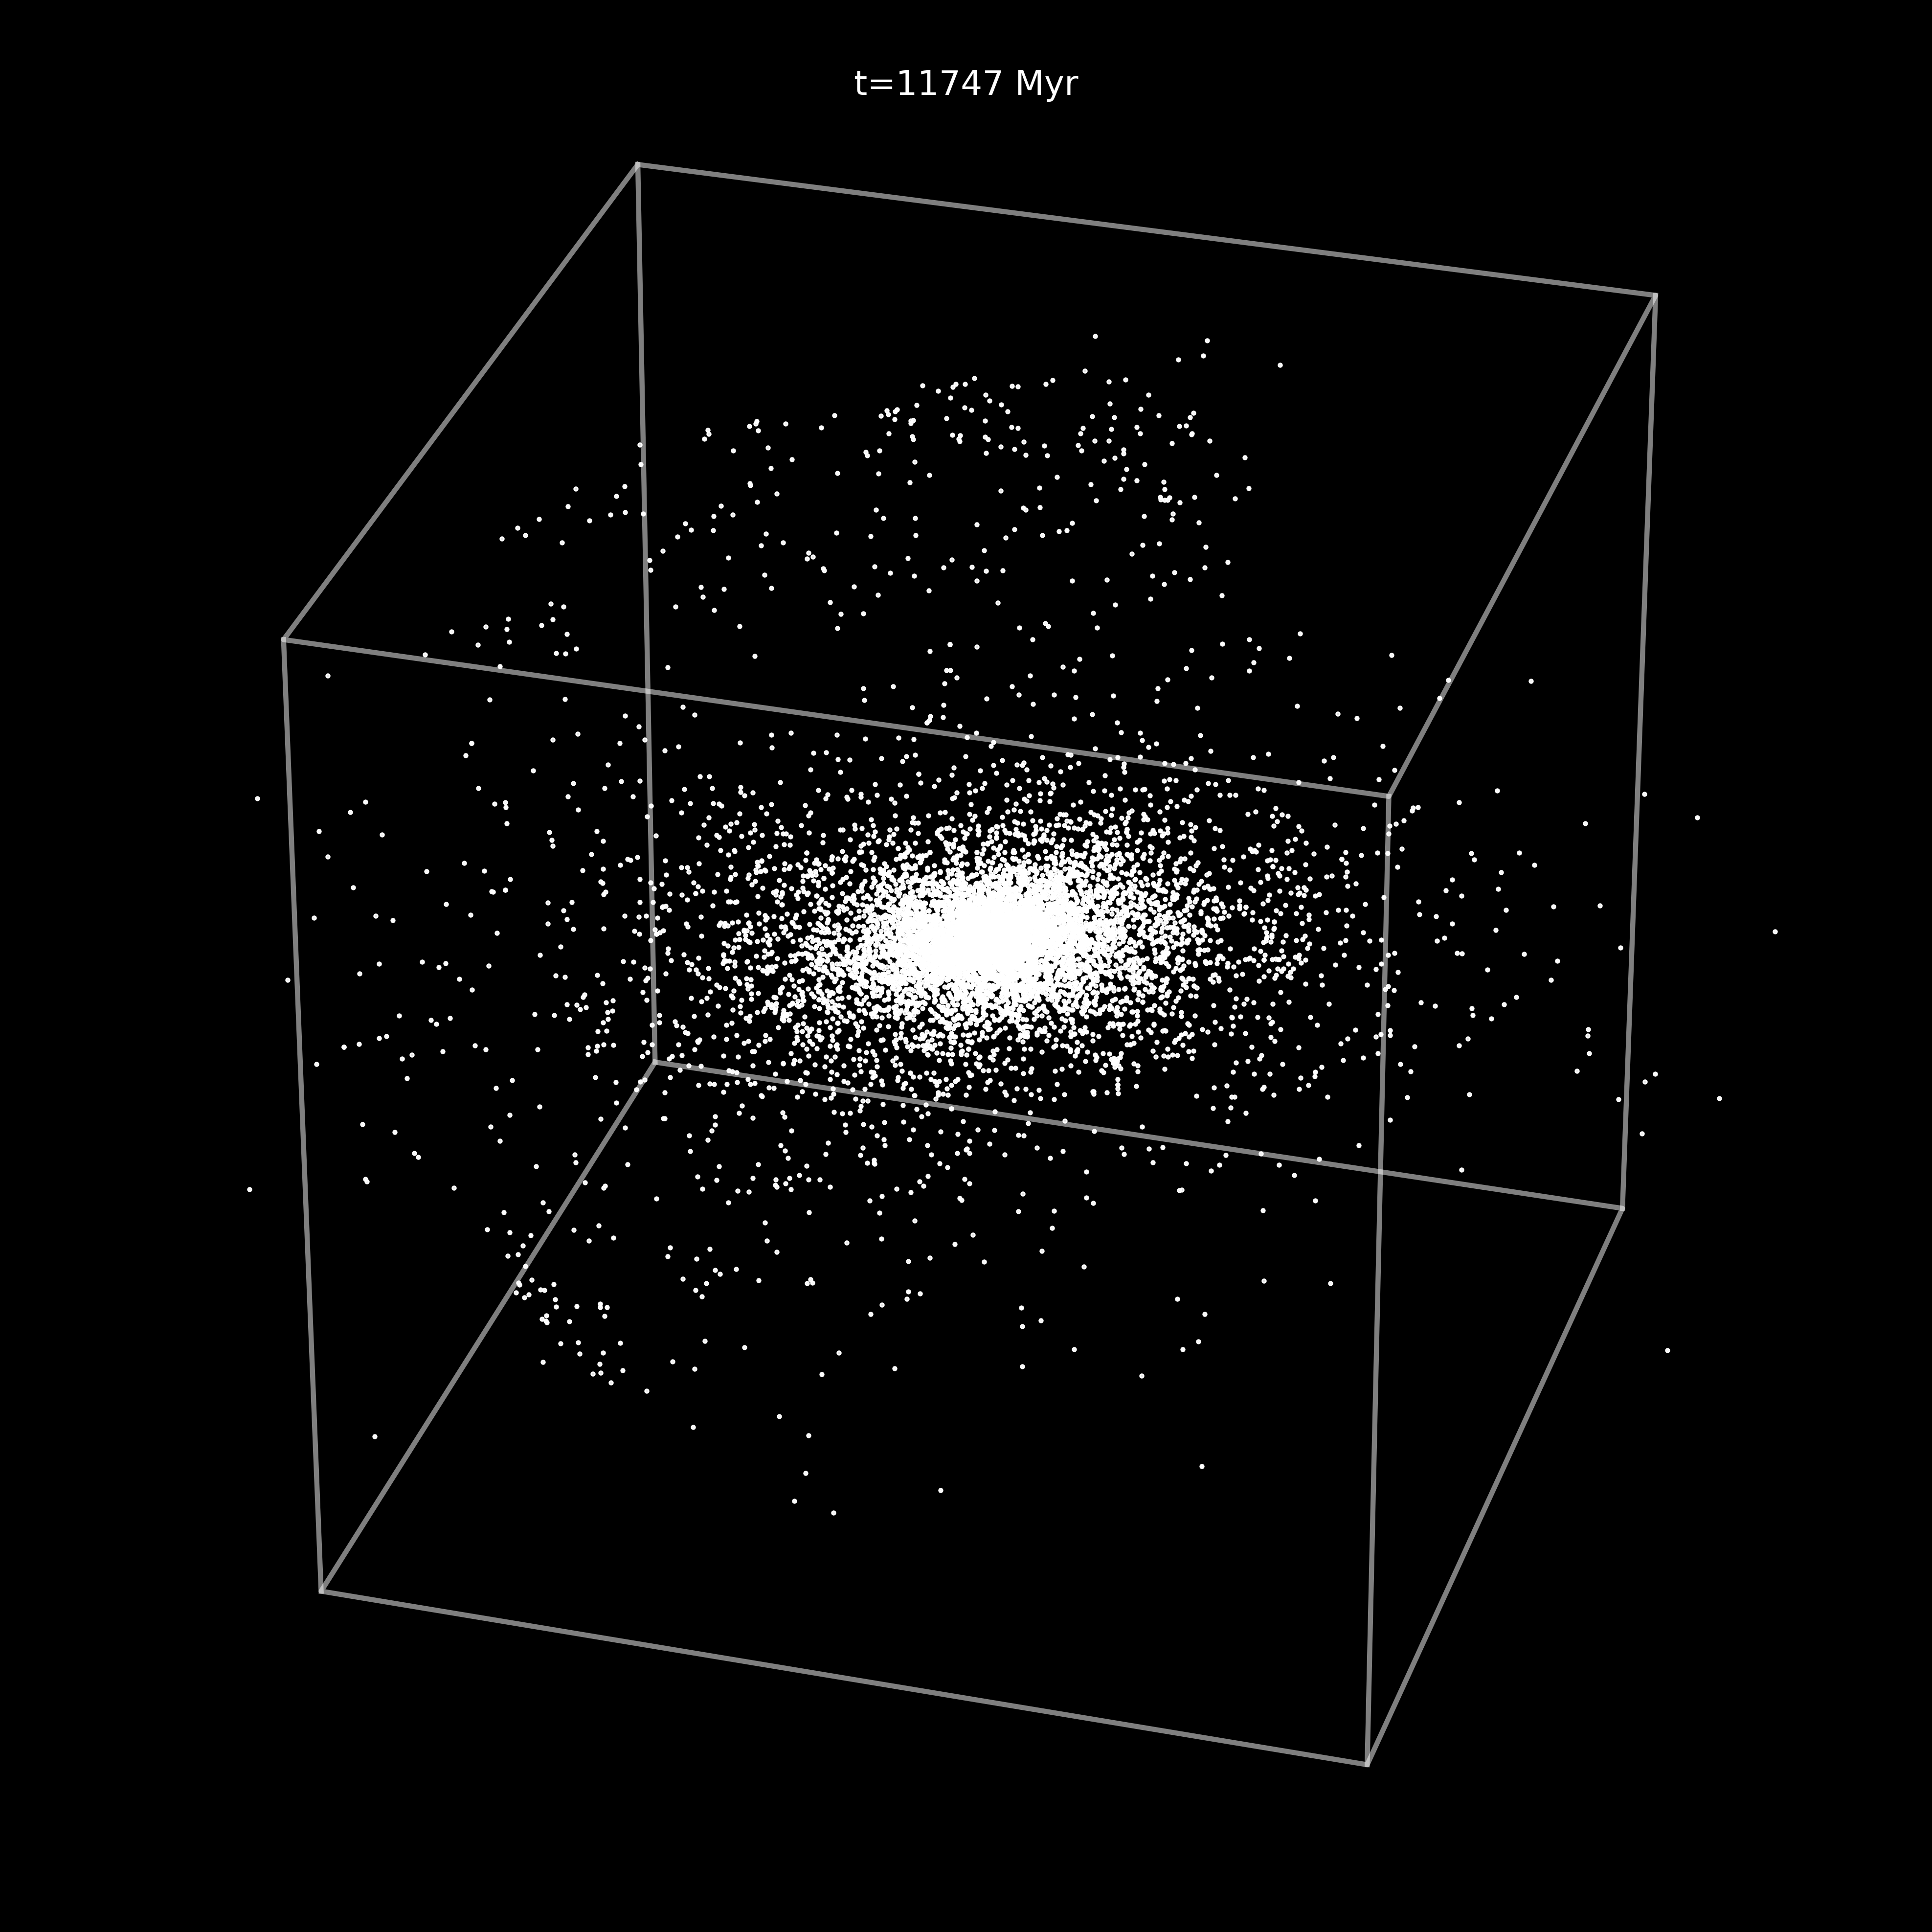

In [15]:
simulation.fig

In [16]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/C--8uwSRQ6Q?si=6YnfSjwaX6DBPE8-" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>')

C:\Users\mirab\AppData\Roaming\Python\Python310\site-packages\IPython\core\display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Video link: [https://youtu.be/C--8uwSRQ6Q](https://youtu.be/C--8uwSRQ6Q)

It can be seen that at the beginning the merger starts to disperse (initial velocity is too high for the considered gravity to maintain the disk). The central galaxy affects to the small one, so that the latter quickly falls and merges. Forming a pseudo-halo in the central galaxy. As we know currently, many substructures from mergers are found in the halo of the Milky Way. This fun simulation is also capable of forming substructures in this pseudo-halo. 